### Livrable 2 Projet IA
### Groupe 06 :
Belkacem Charaf Eddine
Amoura Racim
Rekioua Hani


### Initialisation du notebook avec toutes les librairies et les constantes

In [1]:
import numpy as np
import os
import pandas as pd
import sklearn
from datetime import datetime
import math
from numpy.random import default_rng

random=default_rng(42)
np.random.seed(42)
RANDOM_SEED = 42
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Merge des différentes sources de données

In [ ]:
# Importation des données

employeeSurveyData = pd.read_csv("employee_survey_data.csv")
managerSurveyData = pd.read_csv("manager_survey_data.csv")
HR_Data = pd.read_csv("general_data.csv")
dfIn = pd.read_csv('in_time.csv')
dfOut = pd.read_csv('out_time.csv')

In [ ]:
# Merger les données

dataset = pd.merge(HR_Data, employeeSurveyData,on = ['EmployeeID'] , how='inner')
dataset = pd.merge(dataset, managerSurveyData ,on = ['EmployeeID'] , how='inner')

In [2]:
# adaptation des donnees Date/Heure

publicHoliday = ['2015-01-01','2015-01-14','2015-01-26','2015-03-05','2015-05-01','17-07-2015','17-09-2015','2015-10-02','09-11-2015','2015-11-10', '2015-11-11','2015-12-25']


for idx, row in dfIn.iterrows():
    absenceCount = 0
    presenceCount = 0
    respectFullHours = 0
    totalWorkedHours = 0
    totalWorkedAdditionalHours = 0
    doAdditionnalHours = 0

    for r in row.index:

        if not isinstance(dfIn.at[idx, r], str):
            if math.isnan(dfIn.at[idx, r]) and r not in publicHoliday:
                absenceCount += 1
            continue
        else:
            presenceCount += 1

        inTimeVal = dfIn.at[idx, r]
        outTime = dfOut.at[idx, r]

        t1 = datetime.strptime(inTimeVal, "%Y-%m-%d %H:%M:%S")
        t2 = datetime.strptime(outTime, "%Y-%m-%d %H:%M:%S")

        diff = (t2 - t1).total_seconds() / 3600

        if diff > 8:
            respectFullHours += 1

        totalWorkedHours += diff
        totalWorkedAdditionalHours += diff - 8
    if totalWorkedAdditionalHours < 0:
        totalWorkedAdditionalHours = 0
    if totalWorkedAdditionalHours > 0:
        doAdditionnalHours = 1

    daysSupposedToBeWorked = absenceCount + presenceCount
    dataset.at[idx, 'AbsenceCount'] = absenceCount
    dataset.at[idx, 'PresenceCount'] = presenceCount
    dataset.at[idx, 'DaysSupposedToBeWorked'] = daysSupposedToBeWorked
    dataset.at[idx, 'RespectFullHours'] = respectFullHours # > 8
    dataset.at[idx, 'NotRespectFullHours'] = presenceCount - respectFullHours # < 8
    dataset.at[idx, 'TotalWorkedHours'] = totalWorkedHours
    dataset.at[idx, 'TotalWorkedAdditionalHours'] = totalWorkedAdditionalHours
    dataset.at[idx, 'WorkingAdditionalHoursAverage'] = totalWorkedAdditionalHours / daysSupposedToBeWorked # TotalWorkedAdditionalHours / PresenceCount
    dataset.at[idx, 'doAdditionnalHours'] = doAdditionnalHours # TotalWorkedAdditionalHours / PresenceCount
    dataset.at[idx, 'WorkingHoursAverage'] = totalWorkedHours / daysSupposedToBeWorked # TotalWorkedHours / PresenceCount
    dataset.at[idx, 'PresencePercentage'] = (presenceCount / daysSupposedToBeWorked) * 100  # (PresenceCount / TotalCount) * 100

### Visualiser notre jeu de données

In [3]:
dataset.head(100)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,PresenceCount,DaysSupposedToBeWorked,RespectFullHours,NotRespectFullHours,TotalWorkedHours,TotalWorkedAdditionalHours,WorkingAdditionalHoursAverage,doAdditionnalHours,WorkingHoursAverage,PresencePercentage
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,232.0,252.0,0.0,232.0,1710.686944,0.000000,0.000000,0.0,6.788440,92.063492
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,236.0,252.0,42.0,194.0,1821.676667,0.000000,0.000000,0.0,7.228876,93.650794
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,242.0,252.0,0.0,242.0,1697.204167,0.000000,0.000000,0.0,6.734937,96.031746
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,235.0,252.0,0.0,235.0,1690.514444,0.000000,0.000000,0.0,6.708391,93.253968
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,245.0,252.0,115.0,130.0,1961.512778,1.512778,0.006003,1.0,7.783781,97.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,37,No,Travel_Rarely,Research & Development,8,5,Technical Degree,1,96,Male,...,247.0,252.0,247.0,0.0,2667.170833,691.170833,2.742741,1.0,10.584011,98.015873
96,30,No,Non-Travel,Sales,25,4,Other,1,97,Male,...,245.0,252.0,245.0,0.0,2548.334167,588.334167,2.334659,1.0,10.112437,97.222222
97,26,No,Travel_Rarely,Sales,28,3,Medical,1,98,Female,...,243.0,252.0,0.0,243.0,1456.621389,0.000000,0.000000,0.0,5.780244,96.428571
98,42,No,Travel_Rarely,Sales,2,2,Medical,1,99,Female,...,239.0,252.0,0.0,239.0,1461.033333,0.000000,0.000000,0.0,5.797751,94.841270


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            4410 non-null   int64  
 1   Attrition                      4410 non-null   object 
 2   BusinessTravel                 4410 non-null   object 
 3   Department                     4410 non-null   object 
 4   DistanceFromHome               4410 non-null   int64  
 5   Education                      4410 non-null   int64  
 6   EducationField                 4410 non-null   object 
 7   EmployeeCount                  4410 non-null   int64  
 8   EmployeeID                     4410 non-null   int64  
 9   Gender                         4410 non-null   object 
 10  JobLevel                       4410 non-null   int64  
 11  JobRole                        4410 non-null   object 
 12  MaritalStatus                  4410 non-null   o

In [5]:
dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,PresenceCount,DaysSupposedToBeWorked,RespectFullHours,NotRespectFullHours,TotalWorkedHours,TotalWorkedAdditionalHours,WorkingAdditionalHoursAverage,doAdditionnalHours,WorkingHoursAverage,PresencePercentage
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.00000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,236.265306,252.0,76.153061,160.112245,1821.276283,102.101459,0.405165,0.30000,7.227287,93.756074
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,5.503779,0.0,100.020061,98.799440,331.361528,198.871768,0.789174,0.45831,1.314927,2.184039
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,225.000000,252.0,0.000000,0.000000,1348.803056,0.000000,0.000000,0.00000,5.352393,89.285714
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,232.000000,252.0,0.000000,29.000000,1563.572500,0.000000,0.000000,0.00000,6.204653,92.063492
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,236.000000,252.0,6.000000,226.000000,1745.782222,0.000000,0.000000,0.00000,6.927707,93.650794
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,241.000000,252.0,205.000000,235.000000,1967.295347,86.960903,0.345083,1.00000,7.806728,95.634921
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,248.000000,252.0,248.000000,246.000000,2723.378056,747.378056,2.965786,1.00000,10.807056,98.412698


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeID'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>],
       [<Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'YearsAtCompany'}>,
        <Axes: title={'center': 'YearsSinceLastPromotion'}>,
        <Axes: title={'center': 'YearsWithCurrManager'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'JobSatisfaction'}>],
       [<Axes: title={'center': 'WorkLifeBal

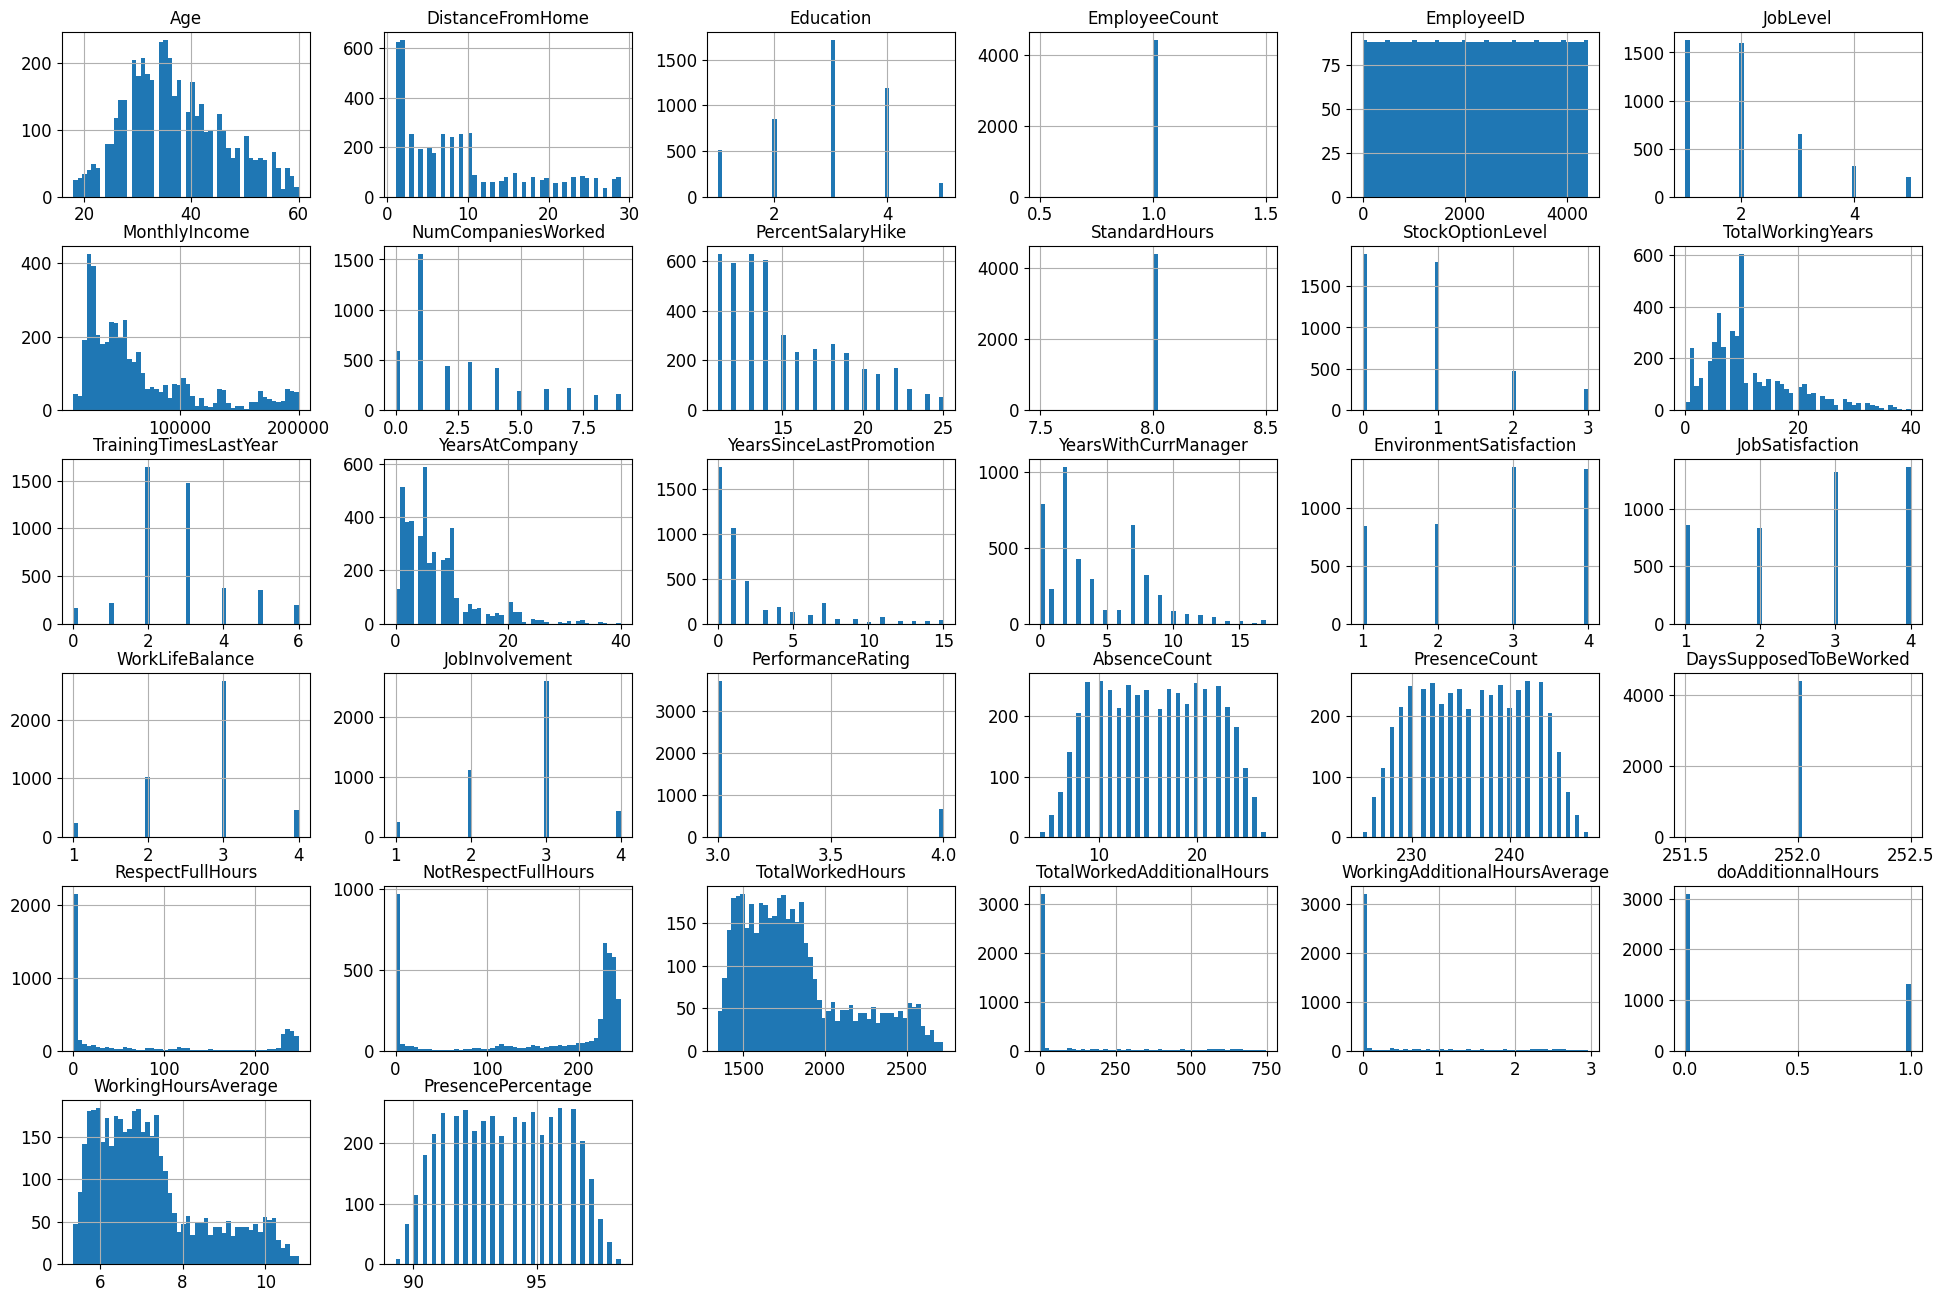

In [6]:
dataset.hist(bins=50, figsize = (24,16))

 De premiere vue on remarque qu'on peut eliminer certaines varibales qui n'ont aucune influence sur notre etude

In [7]:

dataset.drop("EmployeeCount", axis=1, inplace=True)
dataset.drop("StandardHours", axis=1, inplace=True)
dataset.drop("DaysSupposedToBeWorked", axis=1, inplace=True)
dataset.drop("EmployeeID", axis=1, inplace=True)
dataset.drop("Over18", axis=1, inplace=True)
dataset.drop("Gender", axis=1, inplace=True)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'MonthlyIncome'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>],
       [<Axes: title={'center': 'YearsAtCompany'}>,
        <Axes: title={'center': 'YearsSinceLastPromotion'}>,
        <Axes: title={'center': 'YearsWithCurrManager'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'JobSatisfaction'}>],
       [<Axes: title={'center': 'WorkLifeBalance'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'A

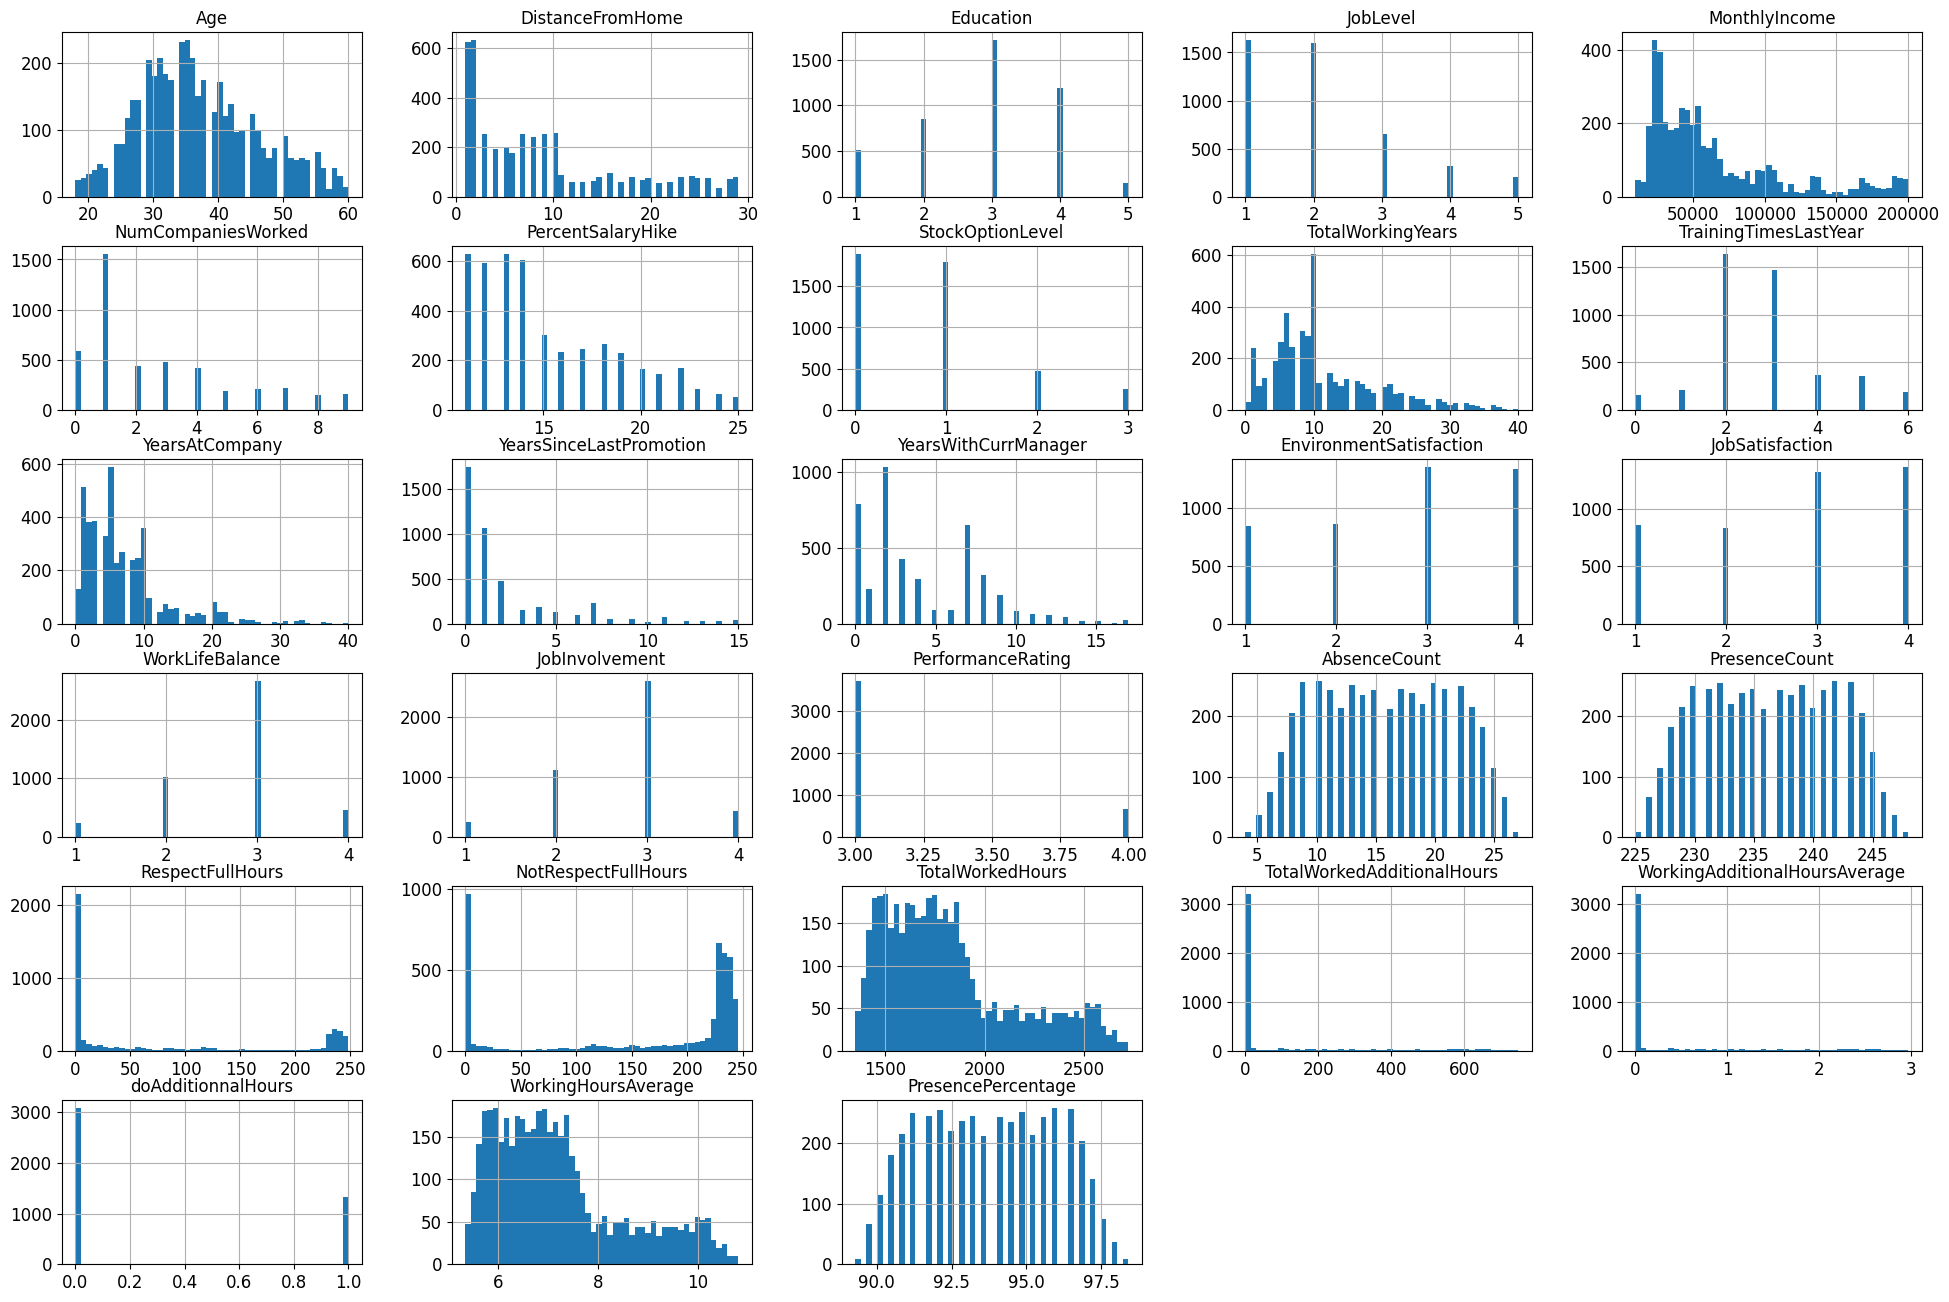

In [8]:
dataset.hist(bins=50, figsize = (24,16))

### Analyse de nos datas

Nous pouvons analyser les données obtenues pour essayer de déceler les attributs les plus pertinents par exemple ou simplement pour se mettre au courant de l'architecture du dataset sur lequel nous allons travailler.

### ANOVA

                sum_sq      df         F    PR(>F)
Attrition     1.055550     1.0  1.006785  0.315729
Residual   4621.507715  4408.0       NaN       NaN


<Axes: xlabel='Attrition', ylabel='Education'>

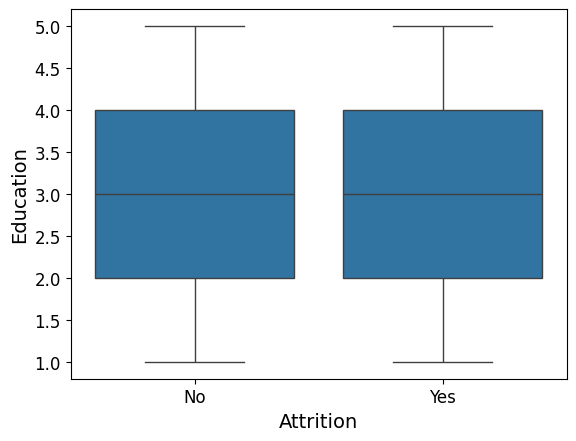

In [9]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns


model = ols('Education ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="Education", data=dataset)

                  sum_sq      df           F        PR(>F)
Attrition    9322.000234     1.0  114.631682  1.996802e-26
Residual   358464.399766  4408.0         NaN           NaN


<Axes: xlabel='Attrition', ylabel='Age'>

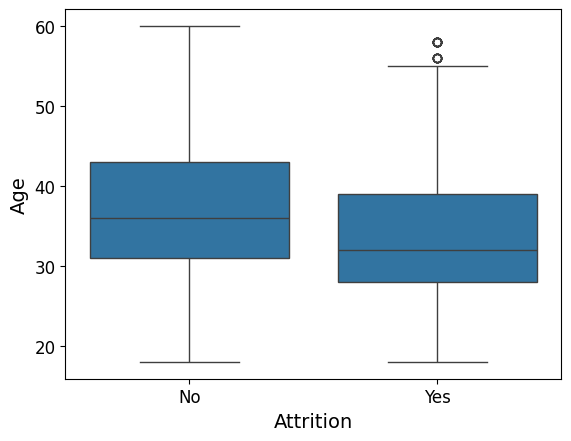

In [10]:
model = ols('Age ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="Age", data=dataset)


                 sum_sq      df         F    PR(>F)
Attrition     62.478105     1.0  4.670237  0.030743
Residual   58969.921895  4408.0       NaN       NaN


<Axes: xlabel='Attrition', ylabel='PercentSalaryHike'>

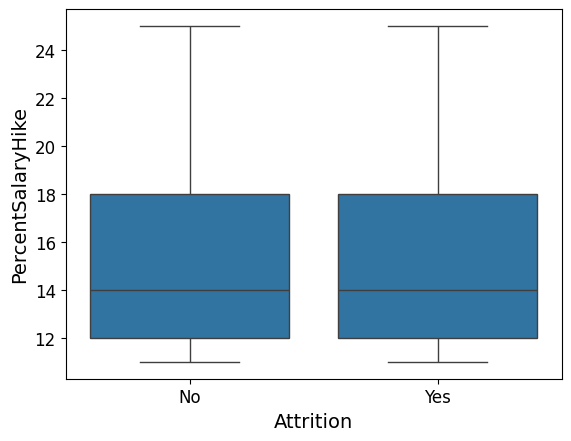

In [11]:
model = ols('PercentSalaryHike ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="PercentSalaryHike", data=dataset)

                sum_sq      df         F    PR(>F)
Attrition     0.149647     1.0  0.206171  0.649807
Residual   3199.485047  4408.0       NaN       NaN


<Axes: xlabel='Attrition', ylabel='StockOptionLevel'>

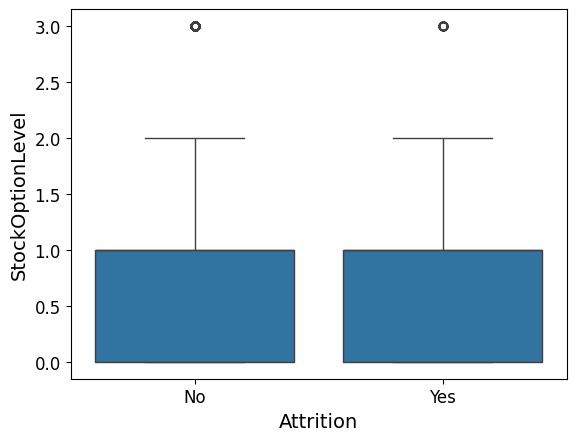

In [12]:
model = ols('StockOptionLevel ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="StockOptionLevel", data=dataset)

                sum_sq      df          F    PR(>F)
Attrition    17.898745     1.0  10.796808  0.001025
Residual   7307.499215  4408.0        NaN       NaN


<Axes: xlabel='Attrition', ylabel='TrainingTimesLastYear'>

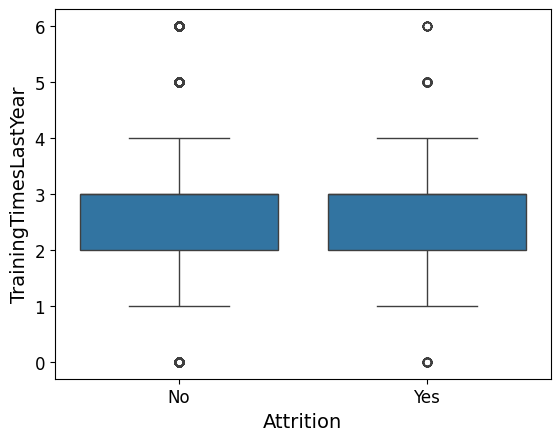

In [13]:
model = ols('TrainingTimesLastYear ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="TrainingTimesLastYear", data=dataset)

                  sum_sq      df          F        PR(>F)
Attrition    2987.581142     1.0  81.078445  3.163883e-19
Residual   162426.124981  4408.0        NaN           NaN


<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

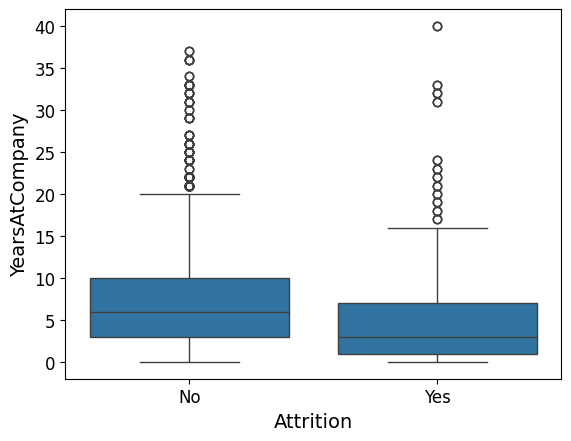

In [14]:
model = ols('YearsAtCompany ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="YearsAtCompany", data=dataset)

                 sum_sq      df         F   PR(>F)
Attrition     49.892128     1.0  4.811021  0.02833
Residual   45712.646648  4408.0       NaN      NaN


<Axes: xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

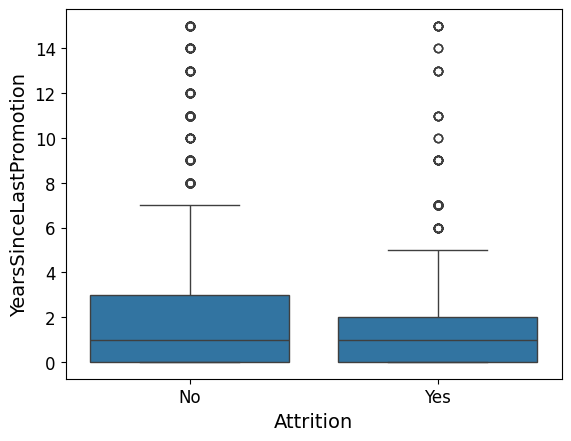

In [15]:
model = ols('YearsSinceLastPromotion ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="YearsSinceLastPromotion", data=dataset)

                 sum_sq      df           F        PR(>F)
Attrition   1368.939116     1.0  110.236968  1.733932e-25
Residual   54739.201700  4408.0         NaN           NaN


<Axes: xlabel='Attrition', ylabel='YearsWithCurrManager'>

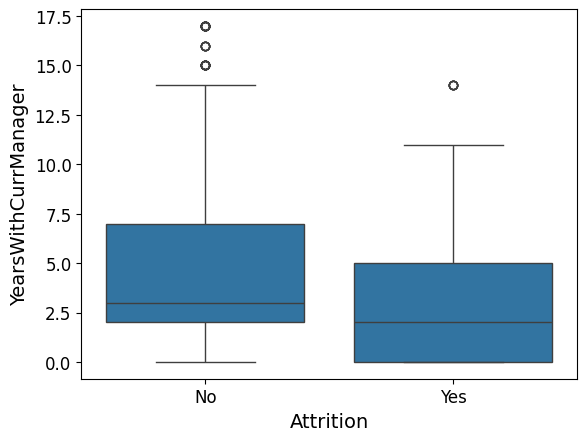

In [16]:
model = ols('YearsWithCurrManager ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="YearsWithCurrManager", data=dataset)

                 sum_sq      df        F    PR(>F)
Attrition  9.494162e+09     1.0  4.28857  0.038427
Residual   9.758558e+12  4408.0      NaN       NaN


<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

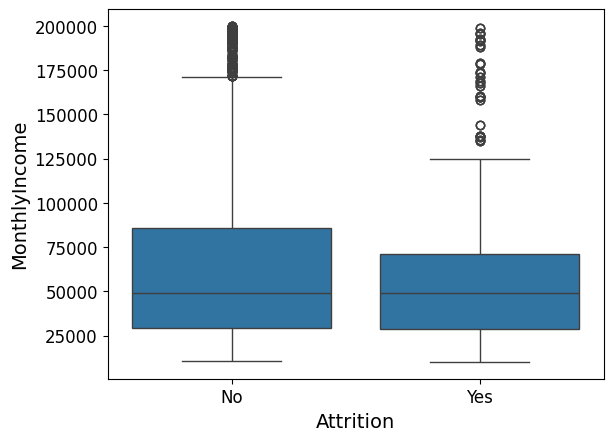

In [17]:
model = ols('MonthlyIncome ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="MonthlyIncome", data=dataset)

                sum_sq      df         F    PR(>F)
Attrition     0.571739     1.0  0.466761  0.494517
Residual   5399.395608  4408.0       NaN       NaN


<Axes: xlabel='Attrition', ylabel='JobLevel'>

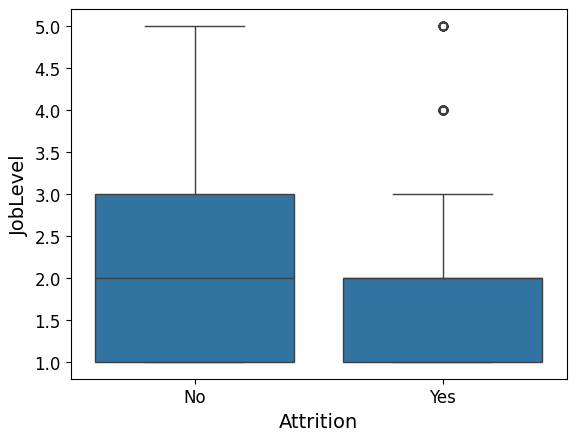

In [18]:
model = ols('JobLevel ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="JobLevel", data=dataset)

                sum_sq      df         F    PR(>F)
Attrition     1.055550     1.0  1.006785  0.315729
Residual   4621.507715  4408.0       NaN       NaN


<Axes: xlabel='Attrition', ylabel='Education'>

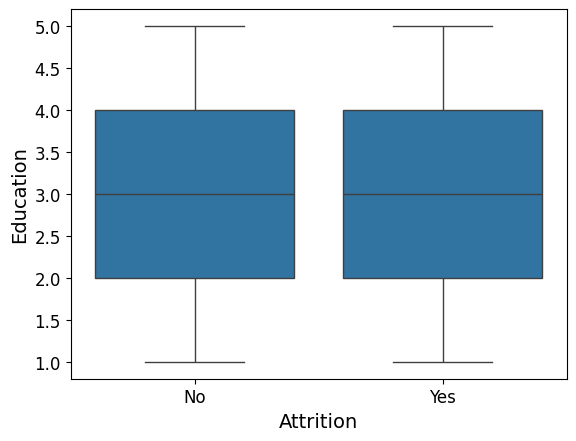

In [19]:
model = ols('Education ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="Education", data=dataset)

                sum_sq      df           F        PR(>F)
Attrition   301.557864     1.0  181.550577  1.399085e-40
Residual   7321.745202  4408.0         NaN           NaN


<Axes: xlabel='Attrition', ylabel='WorkingHoursAverage'>

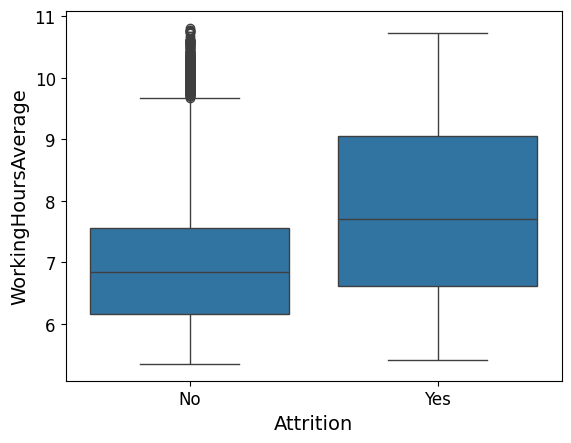

In [20]:
model = ols('WorkingHoursAverage~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="WorkingHoursAverage", data=dataset)

                  sum_sq      df        F    PR(>F)
Attrition      27.421243     1.0  0.41737  0.518286
Residual   289606.131818  4408.0      NaN       NaN

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

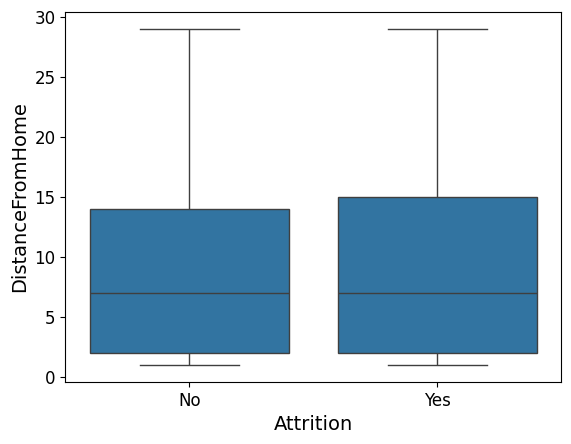

In [21]:
model = ols('DistanceFromHome ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="DistanceFromHome", data=dataset)

                  sum_sq      df         F    PR(>F)
Attrition     252.912372     1.0  8.363206  0.003848
Residual   133302.679465  4408.0       NaN       NaN


<Axes: xlabel='Attrition', ylabel='AbsenceCount'>

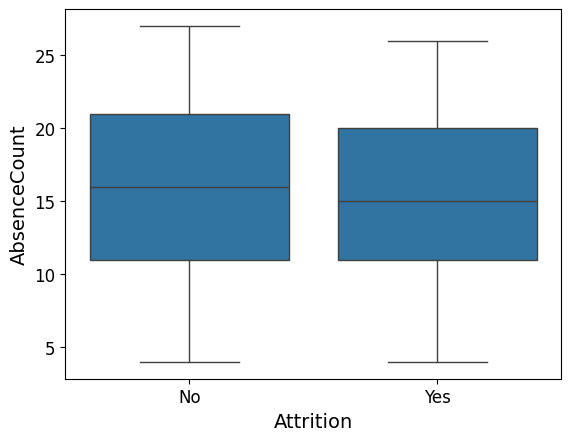

In [22]:
model = ols('AbsenceCount ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="AbsenceCount", data=dataset)

                sum_sq      df          F        PR(>F)
Attrition    54.616378     1.0  46.209562  1.205426e-11
Residual   5180.390691  4383.0        NaN           NaN


<Axes: xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

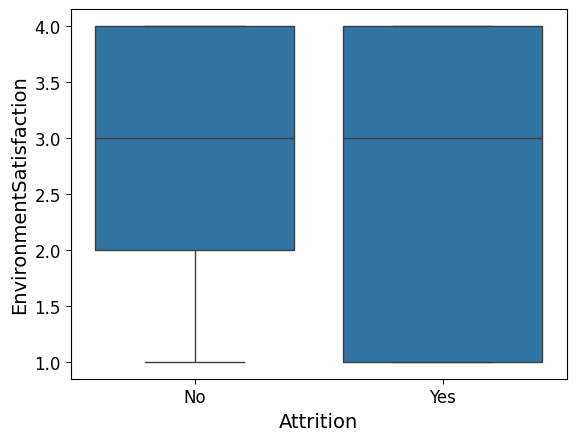

In [23]:
model = ols('EnvironmentSatisfaction ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="EnvironmentSatisfaction", data=dataset)

                sum_sq      df          F        PR(>F)
Attrition    56.301502     1.0  46.909936  8.462259e-12
Residual   5266.495993  4388.0        NaN           NaN


<Axes: xlabel='Attrition', ylabel='JobSatisfaction'>

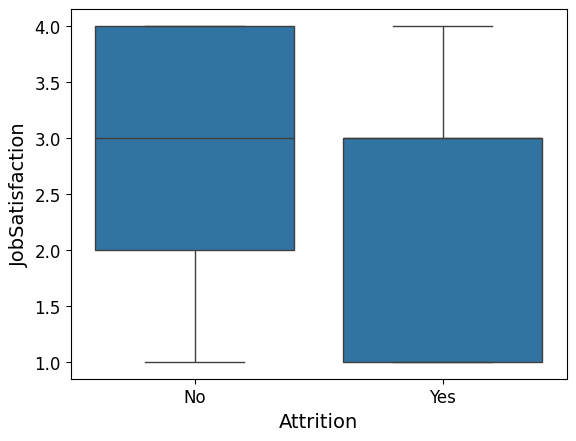

In [24]:
model = ols('JobSatisfaction ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="JobSatisfaction", data=dataset)

                sum_sq      df          F    PR(>F)
Attrition     8.586155     1.0  17.278336  0.000033
Residual   2171.592024  4370.0        NaN       NaN


<Axes: xlabel='Attrition', ylabel='WorkLifeBalance'>

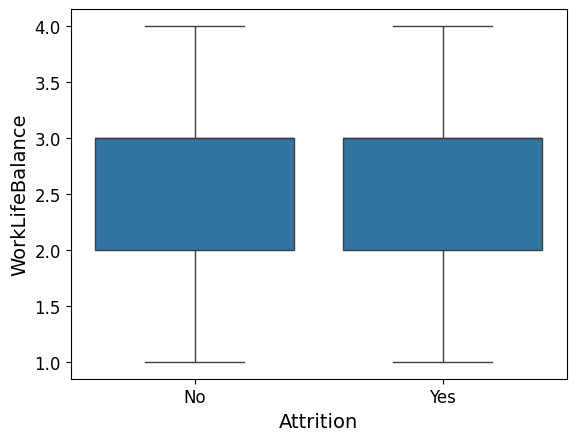

In [25]:
model = ols('WorkLifeBalance ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="WorkLifeBalance", data=dataset)

                sum_sq      df         F    PR(>F)
Attrition     0.542179     1.0  1.071328  0.300702
Residual   2230.806800  4408.0       NaN       NaN


<Axes: xlabel='Attrition', ylabel='JobInvolvement'>

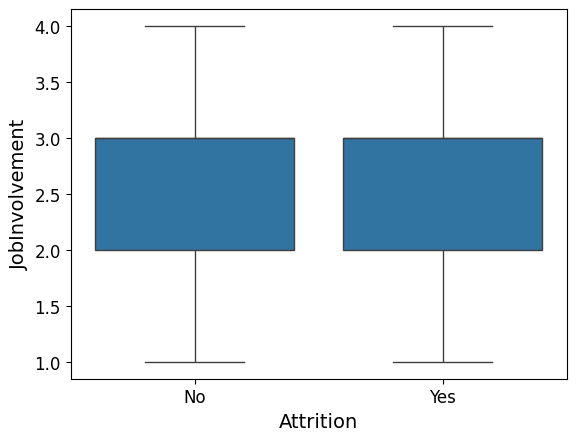

In [26]:
model = ols('JobInvolvement ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="JobInvolvement", data=dataset)

               sum_sq      df         F    PR(>F)
Attrition    0.314252     1.0  2.415602  0.120204
Residual   573.449013  4408.0       NaN       NaN


<Axes: xlabel='Attrition', ylabel='PerformanceRating'>

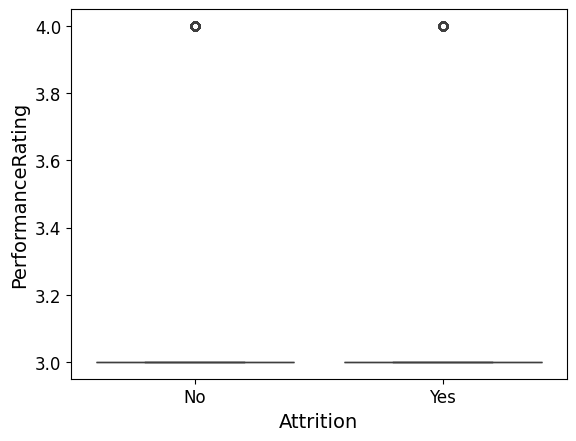

In [27]:
model = ols('PerformanceRating ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="PerformanceRating", data=dataset)

                  sum_sq      df         F    PR(>F)
Attrition     252.912372     1.0  8.363206  0.003848
Residual   133302.679465  4408.0       NaN       NaN


<Axes: xlabel='Attrition', ylabel='PresenceCount'>

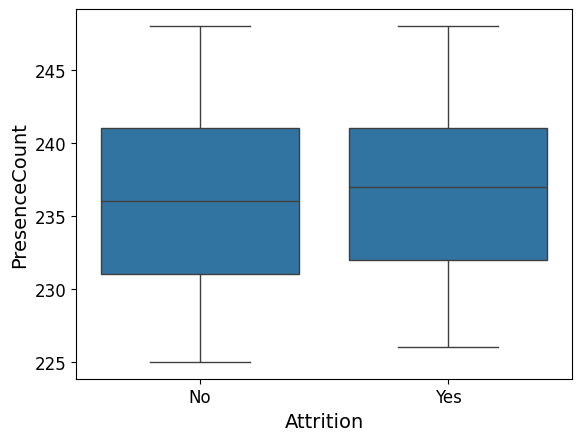

In [28]:
model = ols('PresenceCount ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="PresenceCount", data=dataset)

                 sum_sq      df          F        PR(>F)
Attrition  2.407088e+06     1.0  254.44343  9.857142e-56
Residual   4.170060e+07  4408.0        NaN           NaN


<Axes: xlabel='Attrition', ylabel='RespectFullHours'>

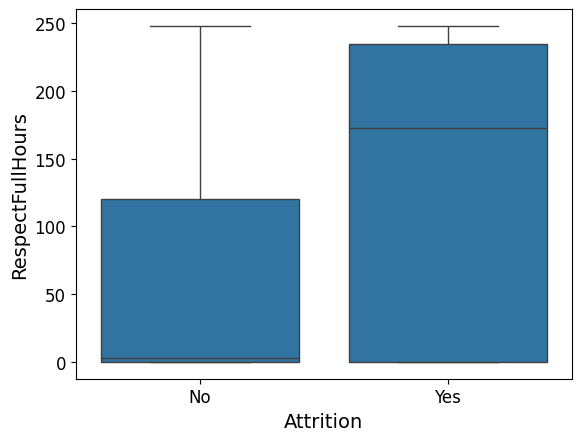

In [29]:
model = ols('RespectFullHours ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="RespectFullHours", data=dataset)

                 sum_sq      df           F        PR(>F)
Attrition  2.357994e+06     1.0  255.509156  5.944766e-56
Residual   4.067971e+07  4408.0         NaN           NaN


<Axes: xlabel='Attrition', ylabel='NotRespectFullHours'>

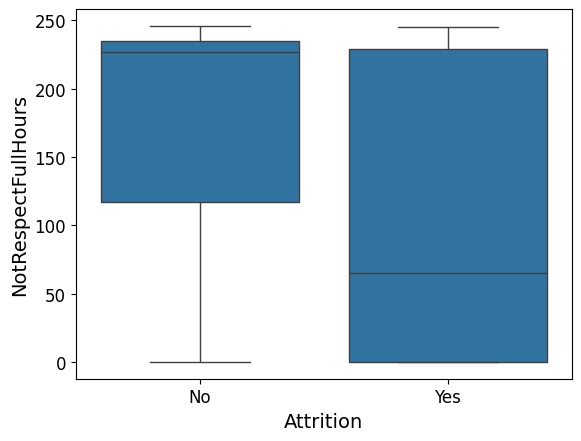

In [30]:
model = ols('NotRespectFullHours ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="NotRespectFullHours", data=dataset)

                 sum_sq      df           F        PR(>F)
Attrition  1.915013e+07     1.0  181.550577  1.399085e-40
Residual   4.649601e+08  4408.0         NaN           NaN


<Axes: xlabel='Attrition', ylabel='TotalWorkedHours'>

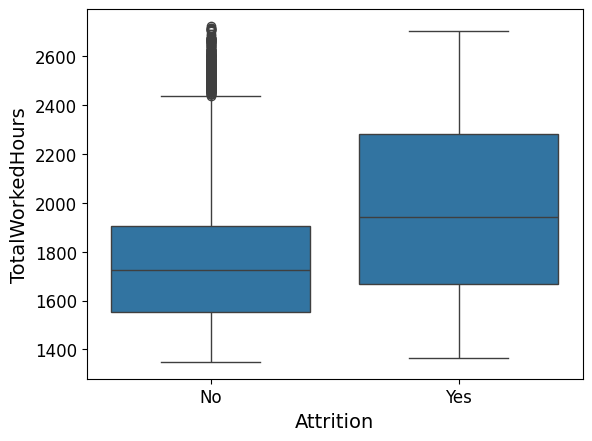

In [31]:
model = ols('TotalWorkedHours ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="TotalWorkedHours", data=dataset)

                 sum_sq      df           F        PR(>F)
Attrition  5.984904e+06     1.0  156.667884  2.398245e-35
Residual   1.683910e+08  4408.0         NaN           NaN


<Axes: xlabel='Attrition', ylabel='TotalWorkedAdditionalHours'>

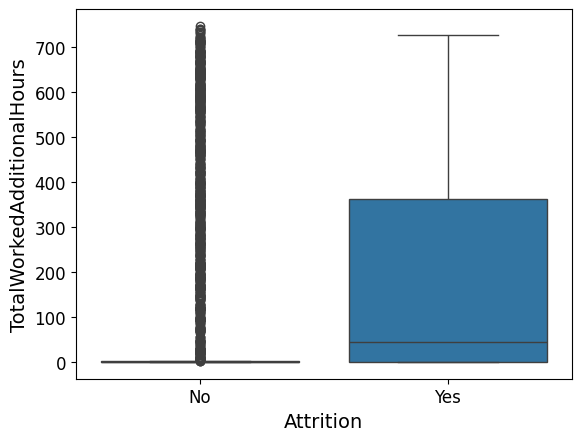

In [32]:
model = ols('TotalWorkedAdditionalHours ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="TotalWorkedAdditionalHours", data=dataset)

                sum_sq      df           F        PR(>F)
Attrition    94.244514     1.0  156.667884  2.398245e-35
Residual   2651.659081  4408.0         NaN           NaN


<Axes: xlabel='Attrition', ylabel='WorkingAdditionalHoursAverage'>

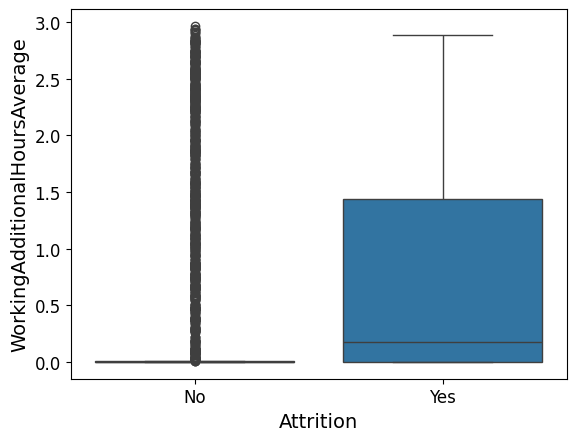

In [33]:
model = ols('WorkingAdditionalHoursAverage ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="WorkingAdditionalHoursAverage", data=dataset)

               sum_sq      df           F        PR(>F)
Attrition   47.721581     1.0  239.483034  1.208836e-52
Residual   878.378419  4408.0         NaN           NaN


<Axes: xlabel='Attrition', ylabel='doAdditionnalHours'>

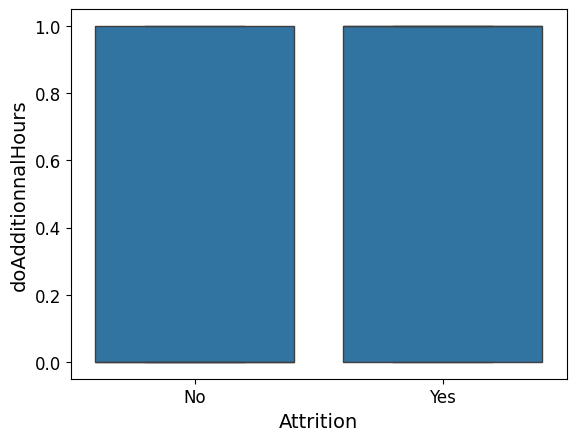

In [34]:
model = ols('doAdditionnalHours ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="doAdditionnalHours", data=dataset)

                 sum_sq      df         F    PR(>F)
Attrition     39.826211     1.0  8.363206  0.003848
Residual   20991.225665  4408.0       NaN       NaN


<Axes: xlabel='Attrition', ylabel='PresencePercentage'>

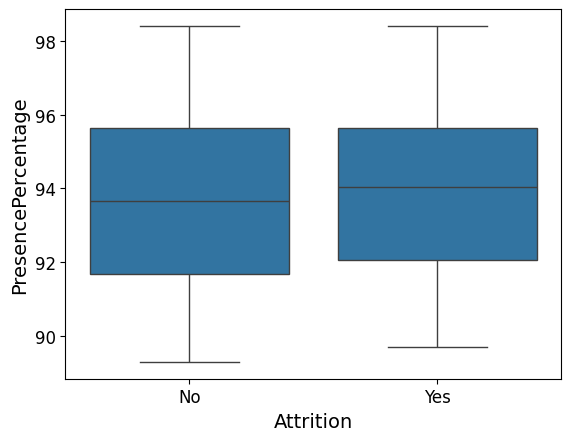

In [35]:
model = ols('PresencePercentage ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="PresencePercentage", data=dataset)

                 sum_sq      df         F    PR(>F)
Attrition     49.155376     1.0  7.884213  0.005009
Residual   27363.917273  4389.0       NaN       NaN


<Axes: xlabel='Attrition', ylabel='NumCompaniesWorked'>

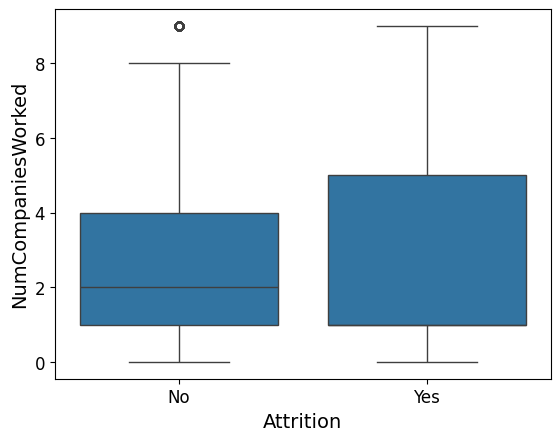

In [36]:
model = ols('NumCompaniesWorked ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="NumCompaniesWorked", data=dataset)

                 sum_sq      df         F    PR(>F)
Attrition     39.826211     1.0  8.363206  0.003848
Residual   20991.225665  4408.0       NaN       NaN


<Axes: xlabel='Attrition', ylabel='PresencePercentage'>

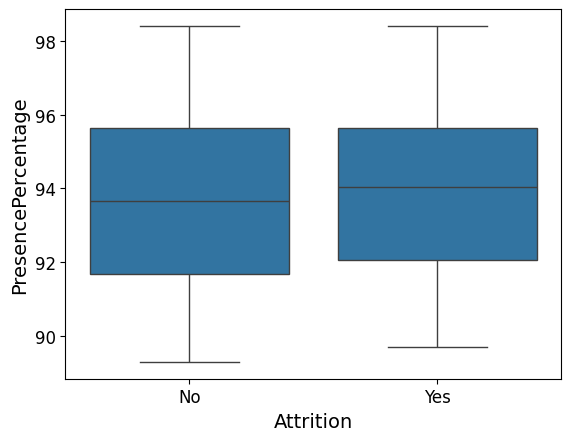

In [37]:
model = ols('PresencePercentage ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="PresencePercentage", data=dataset)

                  sum_sq      df           F        PR(>F)
Attrition    7731.884763     1.0  131.451933  5.241247e-30
Residual   258745.233619  4399.0         NaN           NaN


<Axes: xlabel='Attrition', ylabel='TotalWorkingYears'>

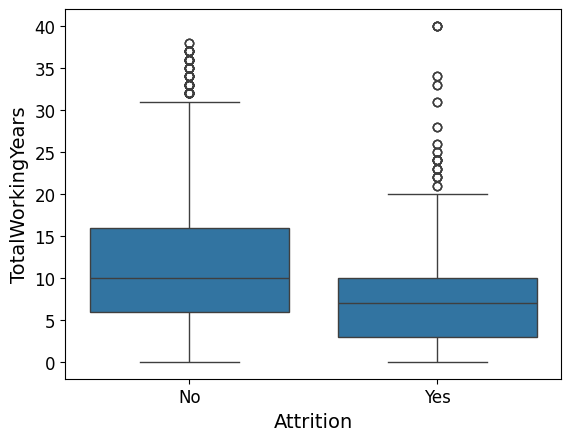

In [38]:
model = ols('TotalWorkingYears ~ Attrition', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)
sns.boxplot(x="Attrition", y="TotalWorkingYears", data=dataset)

### KHI-DEUX

In [39]:
# Table de contigence

cont_table =pd.crosstab(dataset['Attrition'], dataset['BusinessTravel'])
cont_table

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,414,624,2661
Yes,36,207,468


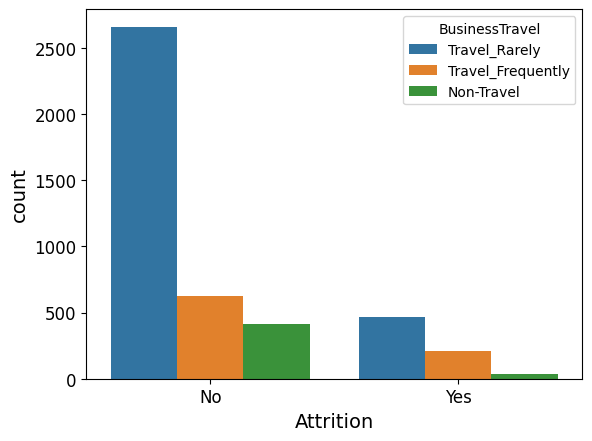

In [40]:
sns.countplot(x='Attrition', hue='BusinessTravel', data=dataset);

In [41]:
cont_table =pd.crosstab(dataset['Attrition'], dataset['Department'])
cont_table

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,132,2430,1137
Yes,57,453,201


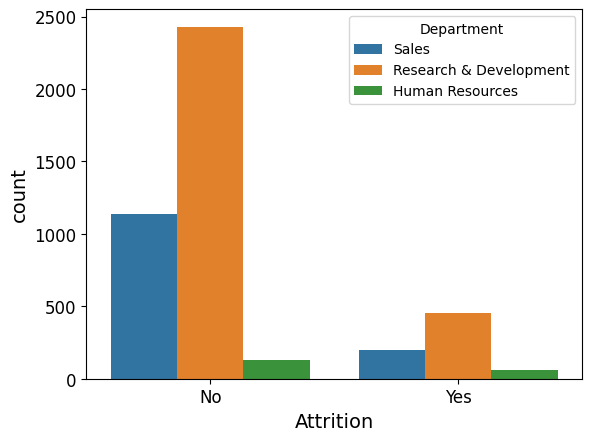

In [42]:
sns.countplot(x='Attrition', hue='Department', data=dataset);

In [43]:
cont_table =pd.crosstab(dataset['Attrition'], dataset['EducationField'])
cont_table

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,48,1515,402,1167,216,351
Yes,33,303,75,225,30,45


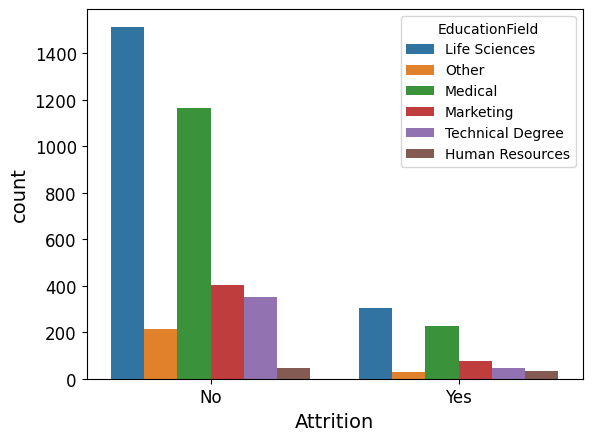

In [44]:
sns.countplot(x='Attrition', hue='EducationField', data=dataset);

In [45]:
cont_table =pd.crosstab(dataset['Attrition'], dataset['JobRole'])
cont_table

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,336,135,651,264,387,183,717,813,213
Yes,57,21,126,42,48,57,159,165,36


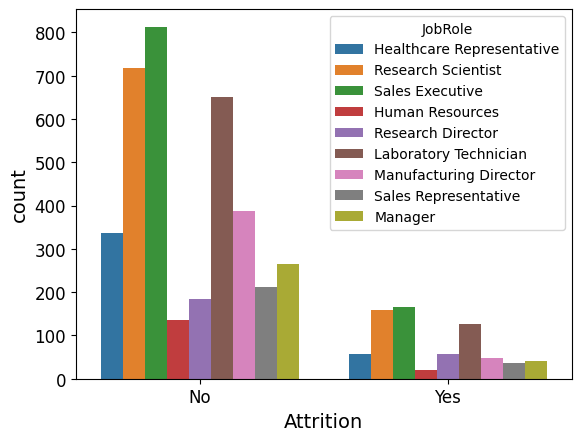

In [46]:
sns.countplot(x='Attrition', hue='JobRole', data=dataset);

In [47]:
cont_table =pd.crosstab(dataset['Attrition'], dataset['MaritalStatus'])
cont_table

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,882,1767,1050
Yes,99,252,360


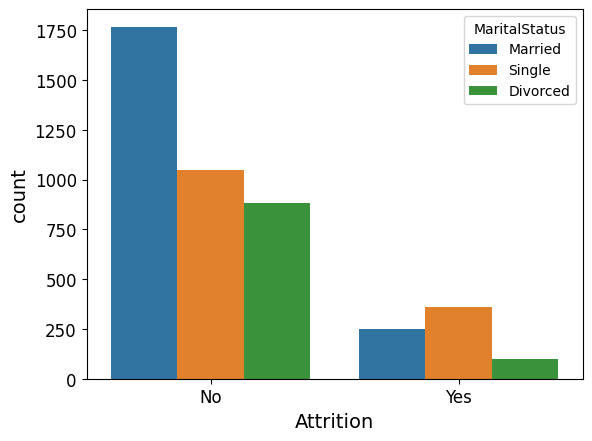

In [48]:
sns.countplot(x='Attrition', hue='MaritalStatus', data=dataset);

In [49]:
cont_table =pd.crosstab(dataset['Attrition'], dataset['DistanceFromHome'])
cont_table

DistanceFromHome,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
Attrition,,,,,,,,,,,,,,,,,,,,,
No,528,519,222,159,165,156,204,207,219,198,...,66,48,48,69,75,69,72,27,57,69
Yes,96,114,30,33,30,21,48,33,36,60,...,9,6,9,12,9,6,3,9,12,12


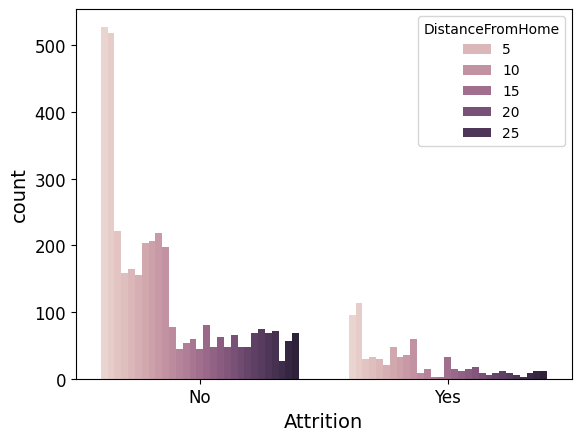

In [50]:
sns.countplot(x='Attrition', hue='DistanceFromHome', data=dataset);

## **Corrélation Inter-données**
Sachant que nous chercherons à prédire l'attrition, il parait intéréssant de voir quelles sont les données les plus corrélées avec cette dernière, nous allons donc monter une matrice de corrélation sur le jeu de données global.

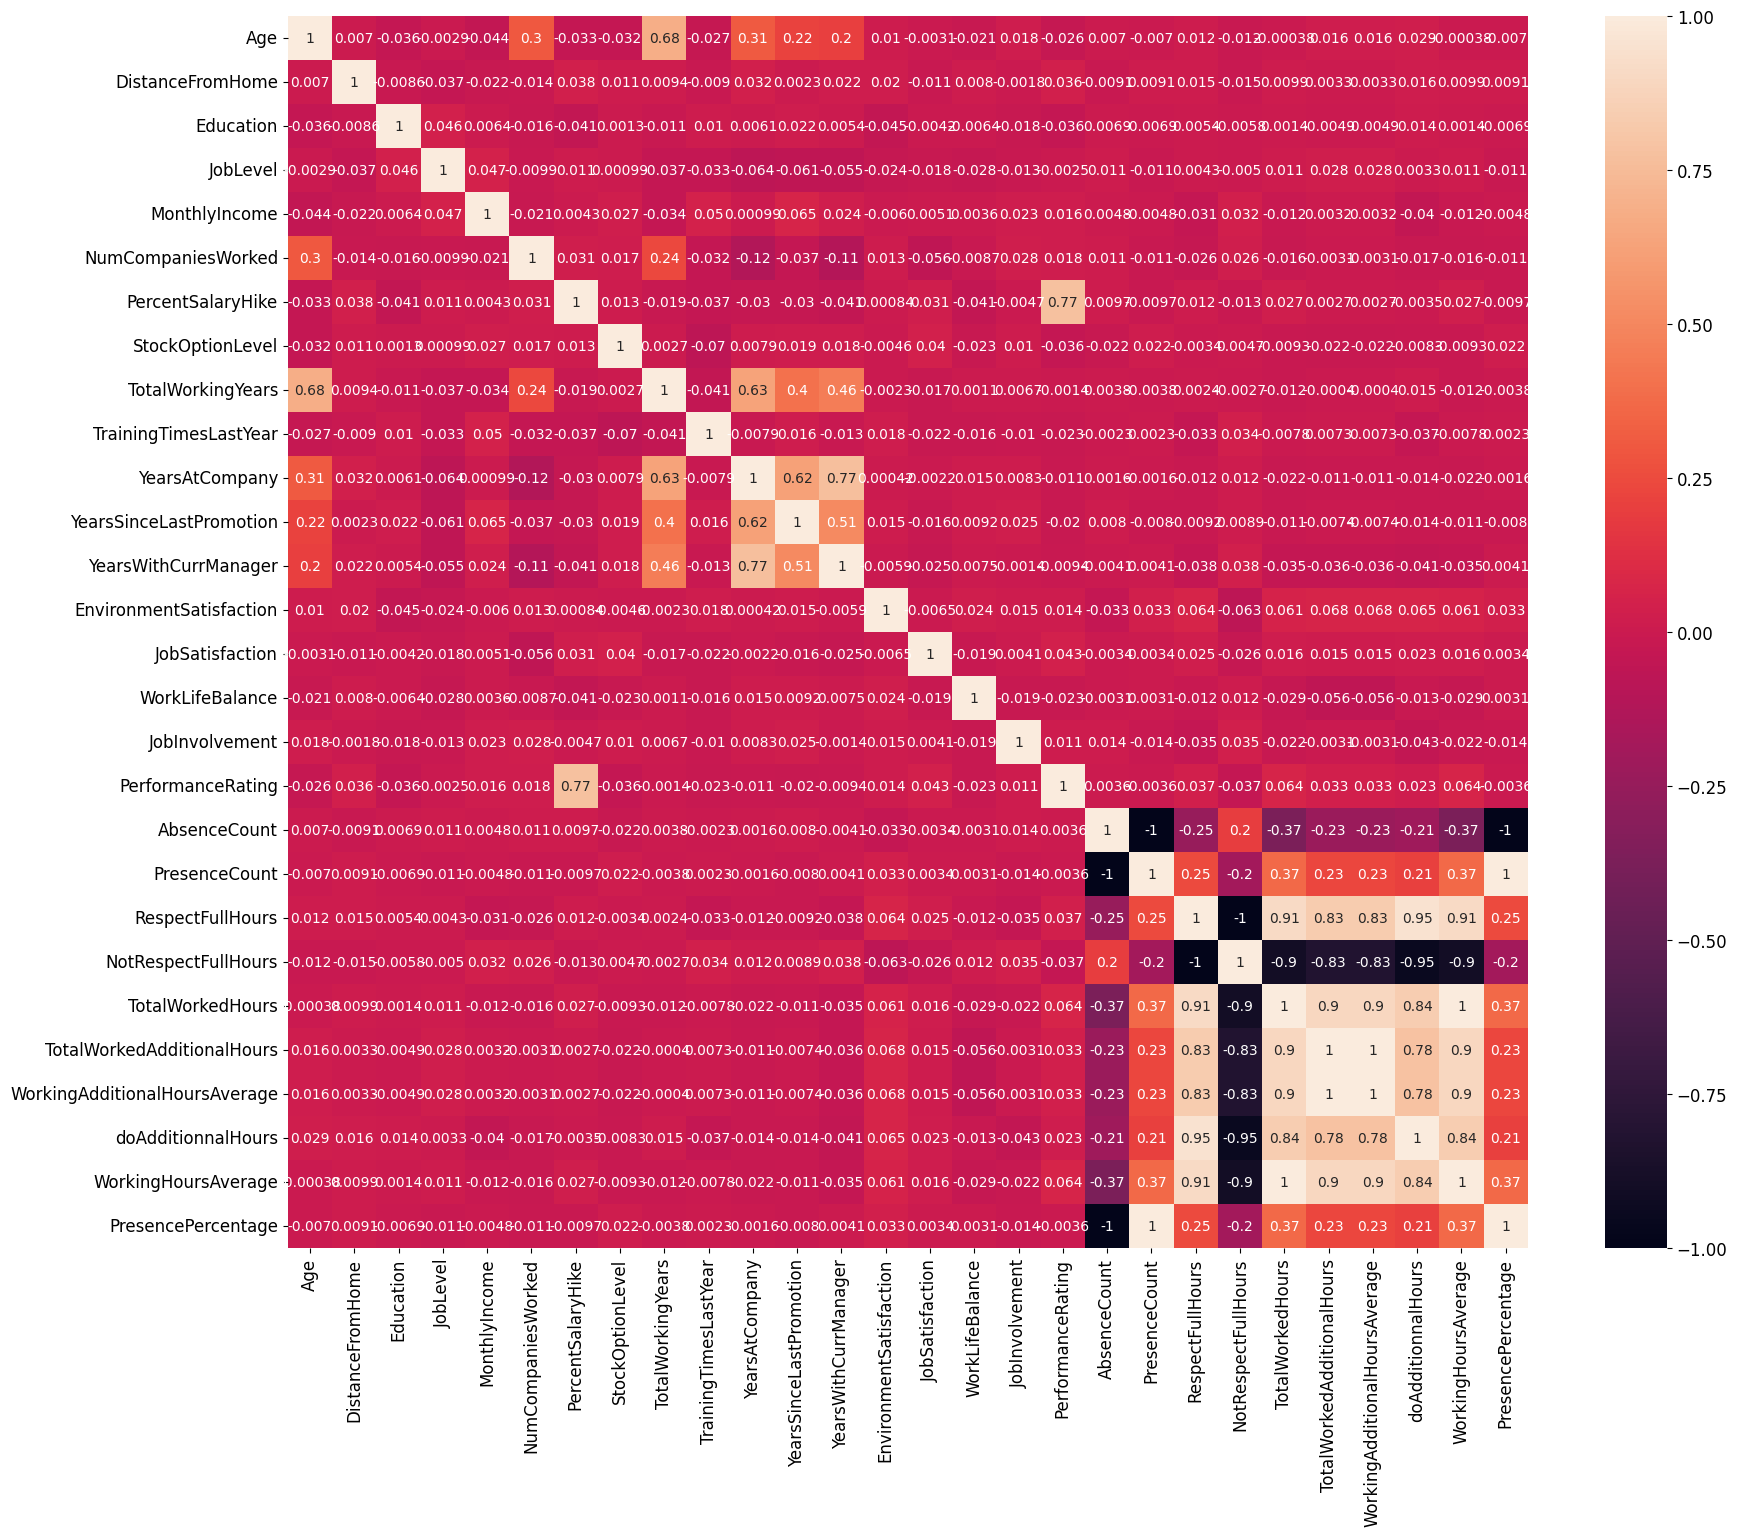

In [51]:
#changed


import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_dataset = dataset.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix on the numeric dataset
corrMatrix = numeric_dataset.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corrMatrix, annot=True)
plt.show()


### Préparation de nos datasets (Pipeline)

Les datas sont prêtes à être exploité et pour cela on commence par les transformer à notre guise.

Nous allons pouvoir créer une pipeline qui serait la résultante de tous les autres (réalisés dans le bon ordre) et ainsi avoir un contrôle  sur nos données en prévisions de nos plans de lecture.


Pour cela nous utiliserons des pipelines de données customisées qui nous retournerons nos jeux de données customisés et valorisés.

In [52]:
from sklearn.preprocessing import OrdinalEncoder , LabelEncoder

label_encoder = LabelEncoder()
dataset["Attrition"] = label_encoder.fit_transform(dataset["Attrition"])

# Sélectionner toutes les colonnes sauf EmployeeID et Attrition
cat_cols = [col for col in dataset.columns if col not in [ "Attrition"]]
dataset_quant = dataset[cat_cols]

# Encoder les variables catégorielles avec l'encodage ordinal
ordinal_encoder = OrdinalEncoder()
dataset_encoded = ordinal_encoder.fit_transform(dataset_quant)
dataset_encoded = pd.DataFrame(dataset_encoded, columns=cat_cols)

# Ajouter les colonnes "EmployeeID" et "Attrition"
dataset_encoded["Attrition"] = dataset["Attrition"]

In [53]:
from sklearn.impute import KNNImputer
knn = dataset[['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction',
               'JobSatisfaction', 'WorkLifeBalance']]

imputer = KNNImputer(n_neighbors=10)
imputer.fit_transform(knn)
complete_rows = pd.DataFrame(imputer.fit_transform(knn), columns=knn.columns.values)
dataset.update(complete_rows)
dataset.update(dataset_encoded)
dataset.head(50)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,...,AbsenceCount,PresenceCount,RespectFullHours,NotRespectFullHours,TotalWorkedHours,TotalWorkedAdditionalHours,WorkingAdditionalHoursAverage,doAdditionnalHours,WorkingHoursAverage,PresencePercentage
0,33,0,2.0,2.0,5,1,1.0,0,0.0,1.0,...,16.0,7.0,0.0,214.0,1960.0,0.0,0.0,0.0,1960.0,7.0
1,13,1,1.0,1.0,9,0,1.0,0,6.0,2.0,...,12.0,11.0,42.0,176.0,2650.0,0.0,0.0,0.0,2650.0,11.0
2,14,0,1.0,1.0,16,3,4.0,3,7.0,1.0,...,6.0,17.0,0.0,224.0,1878.0,0.0,0.0,0.0,1878.0,17.0
3,20,0,0.0,1.0,1,4,1.0,2,1.0,1.0,...,13.0,10.0,0.0,217.0,1841.0,0.0,0.0,0.0,1841.0,10.0
4,14,0,2.0,1.0,9,0,3.0,0,7.0,2.0,...,3.0,20.0,114.0,112.0,3292.0,23.0,23.0,1.0,3292.0,20.0
5,28,0,2.0,1.0,7,2,1.0,3,5.0,1.0,...,11.0,12.0,224.0,0.0,4265.0,1220.0,1220.0,1.0,4265.0,12.0
6,10,1,2.0,1.0,10,1,3.0,1,7.0,2.0,...,16.0,7.0,1.0,213.0,1350.0,0.0,0.0,0.0,1350.0,7.0
7,11,0,2.0,1.0,17,2,1.0,1,7.0,1.0,...,5.0,18.0,0.0,225.0,1512.0,0.0,0.0,0.0,1512.0,18.0
8,13,0,2.0,1.0,0,2,1.0,2,2.0,1.0,...,18.0,5.0,1.0,211.0,1699.0,0.0,0.0,0.0,1699.0,5.0
9,7,0,0.0,1.0,6,3,3.0,3,2.0,0.0,...,14.0,9.0,0.0,216.0,1658.0,0.0,0.0,0.0,1658.0,9.0


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            4410 non-null   int64  
 1   Attrition                      4410 non-null   int32  
 2   BusinessTravel                 4410 non-null   object 
 3   Department                     4410 non-null   object 
 4   DistanceFromHome               4410 non-null   int64  
 5   Education                      4410 non-null   int64  
 6   EducationField                 4410 non-null   object 
 7   JobLevel                       4410 non-null   int64  
 8   JobRole                        4410 non-null   object 
 9   MaritalStatus                  4410 non-null   object 
 10  MonthlyIncome                  4410 non-null   int64  
 11  NumCompaniesWorked             4410 non-null   float64
 12  PercentSalaryHike              4410 non-null   i

In [55]:
dataset_encoded.drop("WorkLifeBalance", axis=1, inplace=True)
dataset_encoded.drop("DistanceFromHome", axis=1, inplace=True)
dataset_encoded.drop("Education", axis=1, inplace=True)
dataset_encoded.drop("PercentSalaryHike", axis=1, inplace=True)
dataset_encoded.drop("StockOptionLevel", axis=1, inplace=True)
dataset_encoded.drop("AbsenceCount", axis=1, inplace=True)
dataset_encoded.drop("NotRespectFullHours", axis=1, inplace=True)



### Split

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM_SEED)

for train_index, test_index in split.split(dataset, dataset["Attrition"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [57]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3528 entries, 3465 to 1125
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            3528 non-null   int64  
 1   Attrition                      3528 non-null   int32  
 2   BusinessTravel                 3528 non-null   object 
 3   Department                     3528 non-null   object 
 4   DistanceFromHome               3528 non-null   int64  
 5   Education                      3528 non-null   int64  
 6   EducationField                 3528 non-null   object 
 7   JobLevel                       3528 non-null   int64  
 8   JobRole                        3528 non-null   object 
 9   MaritalStatus                  3528 non-null   object 
 10  MonthlyIncome                  3528 non-null   int64  
 11  NumCompaniesWorked             3528 non-null   float64
 12  PercentSalaryHike              3528 non-null   int

In [58]:
X_train = strat_train_set.drop("Attrition", axis=1)
Y_train = strat_train_set["Attrition"].copy()

X_test = strat_test_set.drop("Attrition", axis=1)
Y_test = strat_test_set["Attrition"].copy()

# Les Modèles



**SGD (Stochastique Gradient Descent) :** Gradient stochastique est une approximation de la descente de gradient, applicable lorsque la fonction objectif s’écrit comme une somme de fonctions dérivables : c’est très souvent le cas en apprentissage supervisé.

**Decision Tree :** Un arbre de décision permet d'expliquer une variable cible à partir d'autres variables dites explicatives. Pour ce faire, l'algorithme va séparer les individus en k groupes (généralement k=2 et on parle d’arbre binaire) pour expliquer la variable cible. La première division (on parle aussi de split) est obtenue en choisissant la variable explicative qui permet la meilleure séparation des individus. Cette division donne des sous-populations correspondant au premier nœud de l'arbre.

**Random Forest :** Les forêts d’arbres décisionnels ou forêts aléatoires (Random Forest) sont une technique d’apprentissage ensembliste qui s’appuie sur des arbres de décision. Le modèle random forest implique la création d’arbres décisionnels (decision tree) multiples en utilisant ensembles de données fractionnés à partir des données d’origine. Et en sélectionnant aléatoirement un sous-ensemble de variables à chaque étape de l’arbre décisionnel. Le modèle sélectionne ensuite le mode de toutes les prédictions de chaque arbre décisionnel.

**Regression Logistique :** La régression logistique est semblable à la régression linéaire, mais elle est utilisée pour modéliser la probabilité d’un nombre fini de résultats, généralement deux. Une équation logistique est créée de telle sorte que les valeurs des résultats ne peuvent être qu’entre 0 et 1.

**Perceptron :** Le perceptron est un algorithme d’apprentissage supervisé de classifieurs binaires (séparant deux classes). Il s’agit alors d’un type de classifieur linéaire, et du type de réseau de neurones artificiels le plus simple.

###  Perceptron

In [59]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, precision_score, recall_score

perceptron = Perceptron()

# Entraîner le modèle sur les données d'entraînement
perceptron.fit(X_train, Y_train)

# Faire des prédictions sur les données de test
test_predictions = perceptron.predict(X_test)

# Calculer le F1-score, la précision et le recall sur les données de test
test_f1 = f1_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions)
test_recall = recall_score(Y_test, test_predictions)

# Calculer l'accuracy sur les données de test
test_accuracy = perceptron.score(X_test, Y_test)

print("Accuracy on test data:", test_accuracy)
print("F1-score on test data:", test_f1)
print("Precision on test data:", test_precision)
print("Recall on test data:", test_recall)

Accuracy on test data: 0.7517006802721088
F1-score on test data: 0.35777126099706746
Precision on test data: 0.3065326633165829
Recall on test data: 0.4295774647887324


### RANDOM SEARCH
La recherche aléatoire est une technique d'optimisation d'hyperparamètres utilisée en apprentissage automatique et en apprentissage en profondeur. Elle consiste à sélectionner des combinaisons aléatoires d'hyperparamètres et à évaluer leurs performances sur un ensemble de validation.

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Assuming 'perceptron' is your Perceptron model instance and X_train, Y_train are defined
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Changed 'none' to None
    'alpha': uniform(0.0001, 0.1),
    'max_iter': [1000, 5000, 10000],
}

random_search = RandomizedSearchCV(perceptron, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train, Y_train)


RandomizedSearchCV(cv=5, estimator=Perceptron(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000215B8FE8A90>,
                                        'max_iter': [1000, 5000, 10000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None]},
                   random_state=42)

In [61]:
print(random_search.best_params_)

{'alpha': 0.0059083612168199465, 'max_iter': 1000, 'penalty': None}


In [62]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, precision_score, recall_score

# Assuming X_train, Y_train, X_test, Y_test are already defined

# Correctly instantiate the Perceptron model with `None` for the `penalty` parameter
perceptron_rs = Perceptron(alpha=0.0059083612168199465, max_iter=1000, penalty=None)

# Train the model on the training data
perceptron_rs.fit(X_train, Y_train)

# Make predictions on the test data
test_predictions_rs = perceptron_rs.predict(X_test)

# Calculate the F1-score, precision, and recall on the test data
test_f1 = f1_score(Y_test, test_predictions_rs)
test_precision = precision_score(Y_test, test_predictions_rs)
test_recall = recall_score(Y_test, test_predictions_rs)

# Calculate accuracy on the test data
test_accuracy = perceptron_rs.score(X_test, Y_test)

# Print the evaluation metrics
print("Accuracy on test data:", test_accuracy)
print("F1-score on test data:", test_f1)
print("Precision on test data:", test_precision)
print("Recall on test data:", test_recall)


Accuracy on test data: 0.7517006802721088
F1-score on test data: 0.35777126099706746
Precision on test data: 0.3065326633165829
Recall on test data: 0.4295774647887324


### Grid Search
La recherche par grille (ou grid search en anglais) est une technique d'optimisation d'hyperparamètres utilisée en apprentissage automatique et en apprentissage en profondeur. Elle consiste à définir un ensemble de valeurs possibles pour chaque hyperparamètre à optimiser, puis à évaluer toutes les combinaisons possibles de ces valeurs sur un ensemble de validation. Cette méthode permet de trouver l'ensemble optimal d'hyperparamètres en explorant systématiquement l'espace des combinaisons possibles. Cependant, elle peut être coûteuse en temps de calcul si l'espace des hyperparamètres est grand et complexe.

In [63]:
from sklearn.model_selection import GridSearchCV

pt_gs = Perceptron(tol=1e-3, random_state=42)
pt_gs.fit(X_train,Y_train)

pt_param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'fit_intercept': [True, False],
    'max_iter': [500, 1000, 1500, 2000, 2500]

}
pt_grid = GridSearchCV(pt_gs, pt_param_grid, cv=10, scoring='f1', return_train_score=True)
pt_grid.fit(X_train, Y_train)
pt = pt_grid.best_estimator_

print(pt_grid.best_params_)

{'fit_intercept': False, 'max_iter': 500, 'penalty': 'l1'}


In [64]:
#changed

perceptron_gs = Perceptron(  max_iter= 500, penalty='l1',fit_intercept=True)

# Entraîner le modèle sur les données d'entraînement
perceptron_gs.fit(X_train, Y_train)

# Faire des prédictions sur les données de test
test_predictions_gs = perceptron_rs.predict(X_test)

# Calculer le F1-score, la précision et le recall sur les données de test
test_f1 = f1_score(Y_test, test_predictions_gs)
test_precision = precision_score(Y_test, test_predictions_gs)
test_recall = recall_score(Y_test, test_predictions_gs)

# Calculer l'accuracy sur les données de test
test_accuracy = perceptron_gs.score(X_test, Y_test)

print("Accuracy on test data:", test_accuracy)
print("F1-score on test data:", test_f1)
print("Precision on test data:", test_precision)
print("Recall on test data:", test_recall)

Accuracy on test data: 0.8390022675736961
F1-score on test data: 0.35777126099706746
Precision on test data: 0.3065326633165829
Recall on test data: 0.4295774647887324


## Stochastique Gradient Descent

In [65]:

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score, recall_score

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
test_predictions = sgd.predict(X_test)

# Calculer le F1-score, la précision et le recall sur les données de test
test_f1 = f1_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions)
test_recall = recall_score(Y_test, test_predictions)

# Calculer l'accuracy sur les données de test
test_accuracy =sgd.score(X_test, Y_test)

print("Accuracy on test data:", test_accuracy)
print("F1-score on test data:", test_f1)
print("Precision on test data:", test_precision)
print("Recall on test data:", test_recall)



Accuracy on test data: 0.8356009070294784
F1-score on test data: 0.013605442176870748
Precision on test data: 0.2
Recall on test data: 0.007042253521126761


### Random Search

In [66]:
#Changed

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from scipy.stats import uniform

param_dist = {
    'alpha': uniform(0.0001, 0.1),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'loss': ['hinge', 'log_loss', 'modified_huber']  # Corrected 'log' to 'log_loss'
}

# Perform the random search
sgd_random_search = RandomizedSearchCV(sgd, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
sgd_random_search.fit(X_train, Y_train)

# Display the best hyperparameters found
print('Best hyperparameters:', sgd_random_search.best_params_)
print('Best score:', sgd_random_search.best_score_)


Best hyperparameters: {'alpha': 0.0457069984217036, 'loss': 'modified_huber', 'penalty': 'l2'}
Best score: 0.8367351777067888


In [67]:
sgd_rs = SGDClassifier(alpha=0.0457069984217036, loss='modified_huber', penalty='l2')
sgd_rs.fit(X_train, Y_train)
test_predictions_rs = sgd_rs.predict(X_test)

# Calculer le F1-score, la précision et le recall sur les données de test
test_f1 = f1_score(Y_test, test_predictions_rs)
test_precision = precision_score(Y_test, test_predictions_rs)
test_recall = recall_score(Y_test, test_predictions_rs)

# Calculer l'accuracy sur les données de test
test_accuracy =sgd_rs.score(X_test, Y_test)

print("Accuracy on test data:", test_accuracy)
print("F1-score on test data:", test_f1)
print("Precision on test data:", test_precision)
print("Recall on test data:", test_recall)


Accuracy on test data: 0.828798185941043
F1-score on test data: 0.013071895424836602
Precision on test data: 0.09090909090909091
Recall on test data: 0.007042253521126761


### Grid Search

In [68]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# Assuming sgd is your SGDClassifier instance:
# Ensure max_iter is set to a higher value to address convergence warnings.
sgd = SGDClassifier(max_iter=1000)  # Adjust this value as necessary

sgd_param_grid = [
    {
        'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
        'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],  # Corrected 'log' to 'log_loss'
        'penalty': ['l1', 'l2', 'elasticnet'],
    }
]

sgd_grid = GridSearchCV(sgd, sgd_param_grid, cv=10, scoring='f1', return_train_score=True)
sgd_grid.fit(X_train, Y_train)

print('Best parameters:', sgd_grid.best_params_)


c:\Users\kdebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\kdebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\kdebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\kdebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

Best parameters: {'alpha': 0.001, 'loss': 'squared_hinge', 'penalty': 'l1'}


In [69]:
sgd_gs = SGDClassifier(alpha=0.001, loss='squared_hinge', penalty='l1')
sgd_gs.fit(X_train, Y_train)
test_predictions_gs = sgd_gs.predict(X_test)

# Calculer le F1-score, la précision et le recall sur les données de test
test_f1 = f1_score(Y_test, test_predictions_gs)
test_precision = precision_score(Y_test, test_predictions_gs)
test_recall = recall_score(Y_test, test_predictions_gs)

# Calculer l'accuracy sur les données de test
test_accuracy =sgd_gs.score(X_test, Y_test)

print("Accuracy on test data:", test_accuracy)
print("F1-score on test data:", test_f1)
print("Precision on test data:", test_precision)
print("Recall on test data:", test_recall)

Accuracy on test data: 0.7868480725623582
F1-score on test data: 0.3974358974358974
Precision on test data: 0.36470588235294116
Recall on test data: 0.43661971830985913


### Regression Logistique

In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from daal4py.sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import numpy as np
from sklearn.datasets import load_iris
# Modèle scikit-learn
lr = LogisticRegression()
lr.fit(X_train, Y_train)

test_predictions = lr.predict(X_test)

accuracy = accuracy_score(Y_test, test_predictions)
test_f1 = f1_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions)
test_recall = recall_score(Y_test, test_predictions)

print("Accuracy:", accuracy)
print("F1-score on test data:", test_f1)
print("Precision on test data:", test_precision)
print("Recall on test data:", test_recall)
print("Coefficients:", lr.coef_)



Accuracy: 0.8560090702947846
F1-score on test data: 0.2658959537572254
Precision on test data: 0.7419354838709677
Recall on test data: 0.1619718309859155
Coefficients: [[-2.82283771e-02 -2.36231804e-03 -1.68729343e-02 -4.28938787e-03
  -6.84632482e-04 -3.25199311e-02 -2.01630838e-02  3.76853819e-02
   6.94051160e-02 -7.01705858e-05  1.22952225e-01  6.55015970e-03
  -9.32289934e-03 -4.29883992e-02 -3.67486117e-02 -7.36245982e-02
   9.09635371e-02 -9.41375017e-02 -8.23297210e-02 -8.89509651e-02
  -2.77227810e-02  4.28388005e-03 -1.10403330e-03 -9.63565402e-03
   7.45974401e-03  6.78833433e-03 -2.47340738e-03 -1.05075860e-04
  -5.04088696e-05 -5.04088696e-05  8.18878971e-04 -1.05075860e-04
   7.45974401e-03]]


c:\Users\kdebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Arbre de decision

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt = dt.fit(X_train,Y_train)
# Faire des prédictions sur l'ensemble de test

test_predictions=dt.predict(X_test)
# Évaluer les performances du modèle en utilisant la précision
accuracy = dt.score(X_test, Y_test)
test_f1 = f1_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions)
test_recall = recall_score(Y_test, test_predictions)

print("Accuracy:", accuracy)

print("F1-score on test data:", test_f1)
print("Precision on test data:", test_precision)
print("Recall on test data:", test_recall)


Accuracy: 0.971655328798186
F1-score on test data: 0.9097472924187726
Precision on test data: 0.9333333333333333
Recall on test data: 0.8873239436619719


### Grid Search

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = [
    # essaye 12 (3×4) combinaisons des hyperparametres
    {'min_samples_split': [3, 10, 30], 'min_samples_leaf': [2, 4, 6, 8]},
    # puis essaye 6 (2×3) combinaisons avec splitter à random (best étant la valeur par défaut)
    {'criterion':["gini", "entropy"] ,'splitter': ["best","random"], 'min_samples_split': [3, 10], 'min_samples_leaf': [2, 3, 4]},
]

dt_gs = DecisionTreeClassifier(random_state=42)

# 5 sous-jeux de cross-val, ça fait en tout (12+6)*5=90 tours d'entraînement
grid_search = GridSearchCV(dt_gs, param_grid, cv=5,
                           scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}


In [73]:
dtgs = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, min_samples_split=3, splitter='best')
dtgs = dt.fit(X_train,Y_train)
# Faire des prédictions sur l'ensemble de test

test_predictions=dt.predict(X_test)
# Évaluer les performances du modèle en utilisant la précision
accuracy = dtgs.score(X_test, Y_test)
test_f1 = f1_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions)
test_recall = recall_score(Y_test, test_predictions)

print("Accuracy:", accuracy)
print("F1-score on test data:", test_f1)
print("Precision on test data:", test_precision)
print("Recall on test data:", test_recall)

Accuracy: 0.9727891156462585
F1-score on test data: 0.9136690647482014
Precision on test data: 0.9338235294117647
Recall on test data: 0.8943661971830986


### Random Search

In [74]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Utiliser RandomizedSearchCV pour trouver les meilleurs hyperparamètres
search = RandomizedSearchCV(dt, param_distributions=param_grid, n_iter=10)
search.fit(X_train, Y_train)

print("Best hyperparameters:", search.best_params_)

Best hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}


In [75]:
dtrs = DecisionTreeClassifier( min_samples_leaf=2, min_samples_split=5, max_features='log2', max_depth=None)
dtrs = dt.fit(X_train,Y_train)
# Faire des prédictions sur l'ensemble de test

test_predictions=dt.predict(X_test)
# Évaluer les performances du modèle en utilisant la précision
accuracy = dtrs.score(X_test, Y_test)
test_f1 = f1_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions)
test_recall = recall_score(Y_test, test_predictions)

print("Accuracy:", accuracy)
print("F1-score on test data:", test_f1)
print("Precision on test data:", test_precision)
print("Recall on test data:", test_recall)

Accuracy: 0.9784580498866213
F1-score on test data: 0.9304029304029304
Precision on test data: 0.9694656488549618
Recall on test data: 0.8943661971830986


### Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
#RandomForest
from scipy.stats import randint

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Faire des prédictions sur l'ensemble de test

test_predictions=rf.predict(X_test)
# Évaluer les performances du modèle en utilisant la précision
accuracy = rf.score(X_test, Y_test)
test_f1 = f1_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions)
test_recall = recall_score(Y_test, test_predictions)

print("Accuracy:", accuracy)

print("F1-score on test data:", test_f1)
print("Precision on test data:", test_precision)
print("Recall on test data:", test_recall)



Accuracy: 0.9750566893424036
F1-score on test data: 0.916030534351145
Precision on test data: 1.0
Recall on test data: 0.8450704225352113


In [77]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# définir les hyperparamètres à optimiser
param_distribs = {
    'n_estimators': randint(low=10, high=100),
    'max_features': randint(low=1, high=8),
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}

# effectuer la recherche aléatoire
rnd_search = RandomizedSearchCV(rf, param_distributions=param_distribs, n_iter=10,
                                cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_train, Y_train)

# afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:")
print(rnd_search.best_params_)

Meilleurs hyperparamètres:
{'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 68}


In [78]:
from sklearn.ensemble import RandomForestClassifier
#RandomForest
from scipy.stats import randint

rf_rs = RandomForestClassifier(max_depth=None, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=68)
rf_rs.fit(X_train, Y_train)

# Faire des prédictions sur l'ensemble de test

test_predictions=rf.predict(X_test)
# Évaluer les performances du modèle en utilisant la précision
accuracy = rf_rs.score(X_test, Y_test)
test_f1 = f1_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions)
test_recall = recall_score(Y_test, test_predictions)

print("Accuracy:", accuracy)

print("F1-score on test data:", test_f1)
print("Precision on test data:", test_precision)
print("Recall on test data:", test_recall)

Accuracy: 0.9682539682539683
F1-score on test data: 0.916030534351145
Precision on test data: 1.0
Recall on test data: 0.8450704225352113


### Cross Validation

In [79]:
from sklearn.model_selection import cross_val_score

def display_cross_val_score(model, name):
    scores = cross_val_score(model, X_train, Y_train, scoring="f1", cv=10)

    print("----------------------")
    print("Name:", name)
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#La Cross-Validation est une méthode permettant de tester les performances d’un modèle prédictif de Machine Learning.

display_cross_val_score(sgd_gs, "SGD")
display_cross_val_score(dtrs, "Decision tree")
display_cross_val_score(rf_rs, "Random forest")
display_cross_val_score(perceptron_gs, "Perceptron")

----------------------
Name: SGD
Scores: [0.03278689 0.03174603 0.         0.40522876 0.38095238 0.43181818
 0.54814815 0.29885057 0.3960396  0.03076923]
Mean: 0.25563397955228495
Standard deviation: 0.19798223463228273
----------------------
Name: Decision tree
Scores: [0.88288288 0.83185841 0.90598291 0.86725664 0.85470085 0.87931034
 0.91891892 0.93577982 0.86486486 0.87850467]
Mean: 0.882006030583676
Standard deviation: 0.029361689275539934
----------------------
Name: Random forest
Scores: [0.78723404 0.93577982 0.88461538 0.8125     0.86       0.83673469
 0.83673469 0.78723404 0.84848485 0.82      ]
Mean: 0.8409317522475479
Standard deviation: 0.042864535231114616
----------------------
Name: Perceptron
Scores: [0.         0.         0.11940299 0.         0.         0.
 0.11764706 0.         0.08       0.28009828]
Mean: 0.05971483239964363
Standard deviation: 0.08791719838768625


### Matrice de confusion

In [80]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#La matrice de confusion est l'outil incontournable lorsqu'il s'agit d'étudier les performances d'un système de classification supervisé.
def display_confusion_matrix(pred, name):
    matrix = confusion_matrix(Y_train, pred)

    print("----------------------")
    print("Name:", name)
    print("Matrix:", matrix)


sgd_prediction = cross_val_predict(sgd_gs, X_train, Y_train, cv=10)
display_confusion_matrix(sgd_prediction, 'best_sgd')

dt_prediction = cross_val_predict(dtrs, X_train, Y_train, cv=10)
display_confusion_matrix(dt_prediction, 'decision tree')

rf_prediction = cross_val_predict(rf_rs, X_train, Y_train, cv=10)
display_confusion_matrix(rf_prediction, 'random forest_best')

rl_prediction = cross_val_predict(lr, X_train, Y_train, cv=10)
display_confusion_matrix(rl_prediction, 'logistique regression')

pt_prediction = cross_val_predict(perceptron_gs, X_train, Y_train, cv=10)
display_confusion_matrix(pt_prediction, 'perceptron')

----------------------
Name: best_sgd
Matrix: [[2709  250]
 [ 416  153]]
----------------------
Name: decision tree
Matrix: [[2906   53]
 [  67  502]]
----------------------
Name: random forest_best
Matrix: [[2955    4]
 [ 154  415]]


c:\Users\kdebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kdebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

----------------------
Name: logistique regression
Matrix: [[2929   30]
 [ 487   82]]
----------------------
Name: perceptron
Matrix: [[2637  322]
 [ 501   68]]


c:\Users\kdebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kdebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

### Courbe ROC

AUC - SGD 0.6005365656354478
AUC - Decision tree 0.8666705074803807
AUC - Random_forest 0.9589821883253915
AUC - Logistique_regression 0.7486426980092905
AUC - Percptron 0.5324068657118879


c:\Users\kdebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kdebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

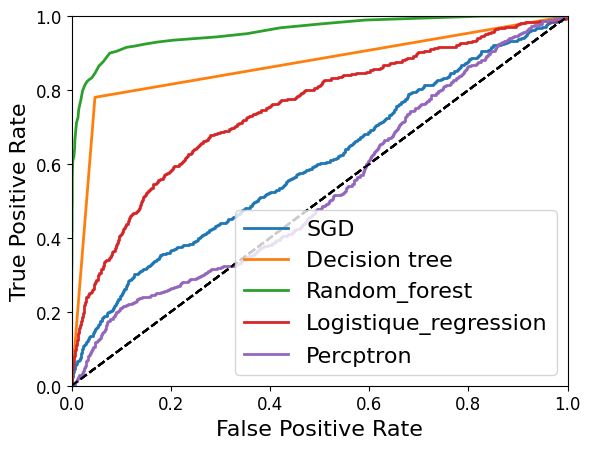

In [81]:

from sklearn.metrics import roc_curve
from sklearn import metrics

def plot_roc_curve_decis(model, name):
    pred = cross_val_predict(model, X_train, Y_train, cv=3, method="decision_function")
    fpr, tpr, thresholds = roc_curve(Y_train, pred)
    m=metrics.auc(fpr, tpr)
    print('AUC - ' +name, m)
    plt.plot(fpr, tpr, linewidth=2, label=name)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

def plot_roc_curve_proba(model, name):
    pred = cross_val_predict(model, X_train, Y_train, cv=3, method="predict_proba")
    fpr, tpr, thresholds = roc_curve(Y_train, pred[:,1])
    m=metrics.auc(fpr, tpr)
    print('AUC - ' +name, m)
    plt.plot(fpr, tpr, linewidth=2, label=name)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# La courbe ROC est un autre moyen d'évaluer un classifieur binaire. Elle confronte le _taux de vrai positif_ (_TPR_ ou _recall_) au _taux de faux positif_

plot_roc_curve_decis(sgd_gs, "SGD")
plot_roc_curve_proba(dtrs, "Decision tree")
plot_roc_curve_proba(rf_rs, "Random_forest")
plot_roc_curve_decis(lr, "Logistique_regression")
plot_roc_curve_decis(perceptron_gs, "Percptron")

plt.legend(loc="lower right", fontsize=16)
plt.show()

### Choisir le meilleur model a adopté

|  Modèles  |Arbre de décision    |Régression logistique |Perceptron         | Random Forest      | SGD                     |
|-----------|---------------------|----------------------|-------------------|--------------------|-------------------------|
|  Accuracy | 0.9807256235827665  | 0.8537414965986394   |0.8390022675736961 | 0.9648526077097506 |0.7517006802721088
|  Precision| 0.9770992366412213 | 0.7241379310344828   |0.3065326633165829 | 1.0                |0.3121951219512195
|  Recall   | 0.9014084507042254 | 0.14788732394366197  |0.4295774647887324| 0.852112676056338  |0.4507042253521127
|  F1 Score | 0.9377289377289377  | 0.24561403508771928  |0.35777126099706746  | 0.9201520912547528 |0.3688760806916426
|  AUC      | 0.8774178565764926  | 0.7542613729166803   |0.5324098354132132 | 0.9569235913667219 | 0.6922136213072507  |

Après avoir examiné les scores des différents modèles en fonction de deux critères, à savoir la performance et l'interprétabilité, nous avons choisi l'arbre de décision comme modèle préféré. Cette décision a été motivée par le fait que l'arbre de décision est à la fois très performant et facilement interprétable. En effet, l'arbre de décision est un modèle d'apprentissage supervisé qui divise de manière récursive l'espace des caractéristiques en sous-espaces en fonction de leurs valeurs, jusqu'à ce que chaque sous-espace soit associé à une décision ou à une classe spécifique. Chaque nœud de l'arbre représente une décision basée sur une caractéristique, et chaque feuille représente une classe. En conséquence, il est relativement simple de comprendre comment l'arbre de décision prend des décisions en examinant sa structure

Nous allons donc dessiner l'arbre de decision pour comprendre les features les plus importants lors de la classification

InvalidParameterError: The 'class_names' parameter of export_graphviz must be an array-like, an instance of 'bool' or an instance of 'numpy.bool_' or None. Got 'Attrition' instead.

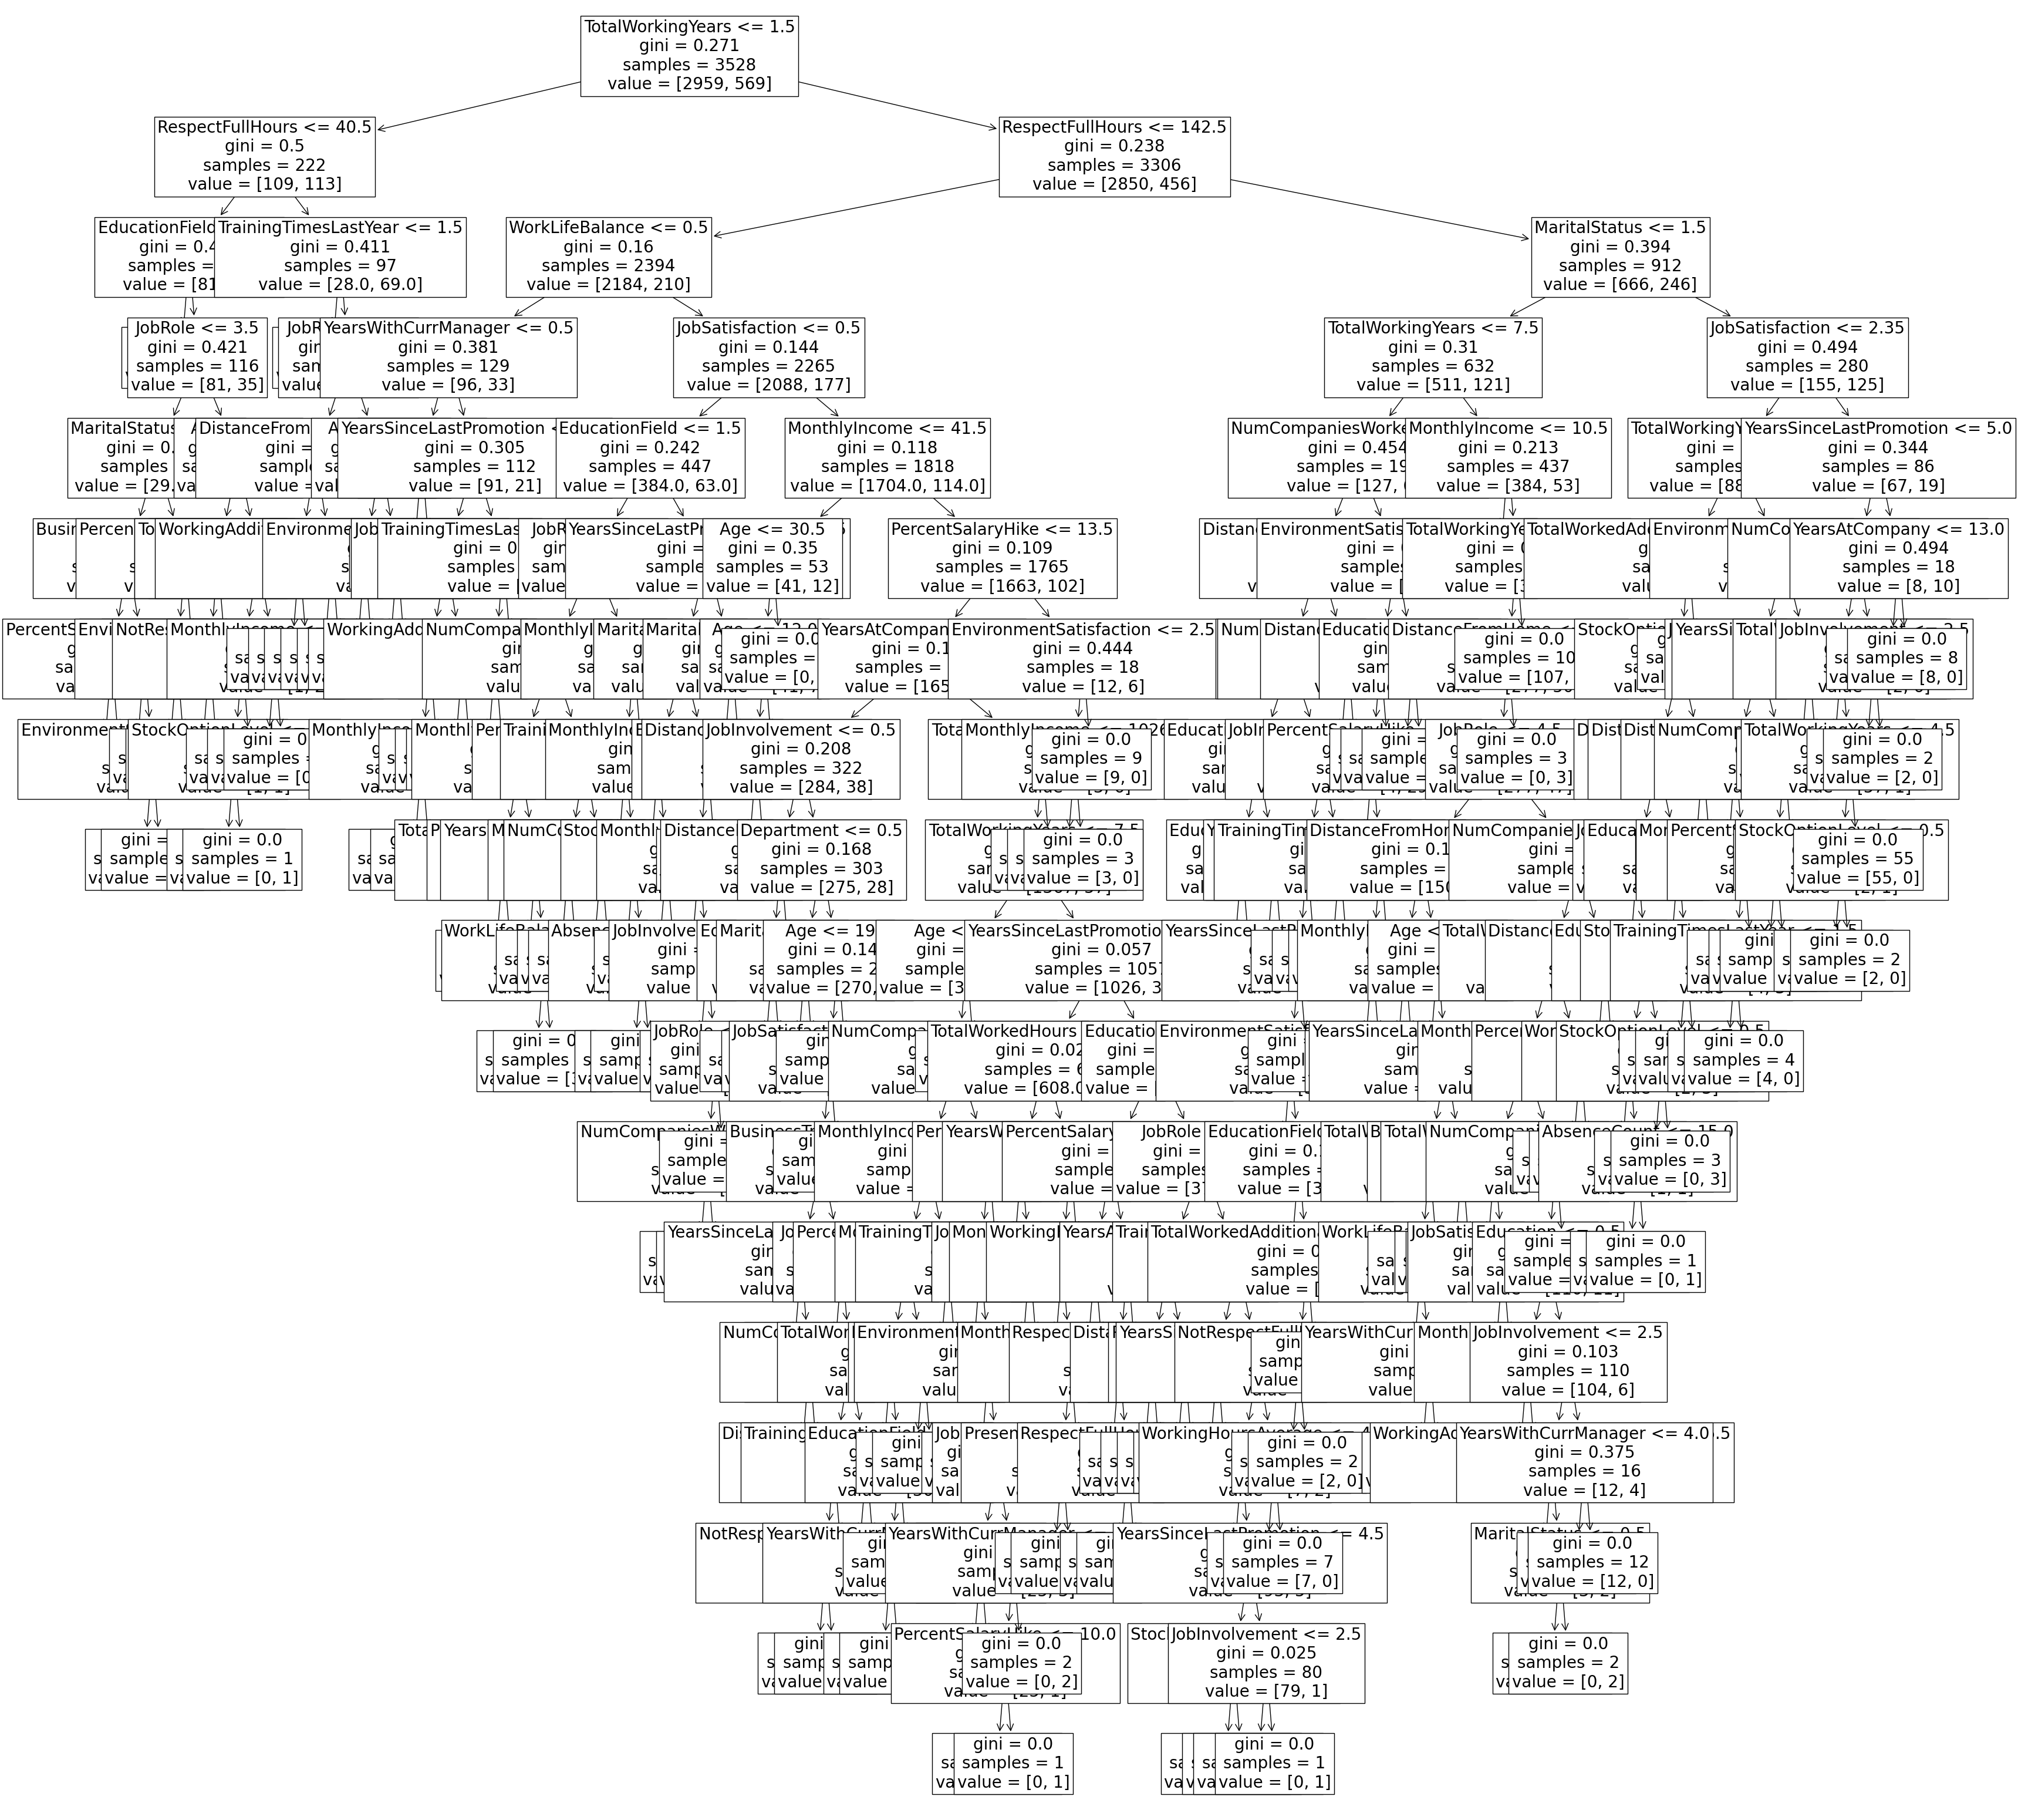

In [82]:
from sklearn import tree
plt.figure(figsize=(40,40))

tree.plot_tree(dtrs, feature_names= X_test.columns,fontsize=20)
tree.export_graphviz(dt,
                     out_file="tree.dot",
                     feature_names = X_test.columns,
                     class_names="Attrition",
                     filled = True)

TotalWorkingYears: 0.13577704062396662
Age: 0.06684043045452705
NumCompaniesWorked: 0.06331429814038991
MonthlyIncome: 0.06221558883310413
RespectFullHours: 0.060625189319707784
DistanceFromHome: 0.052861480715481385
PercentSalaryHike: 0.049649924576496036
JobRole: 0.04868605233882439
YearsSinceLastPromotion: 0.037025439106538834
EnvironmentSatisfaction: 0.03683962456534033
MaritalStatus: 0.035080571819529324
Education: 0.033705040397434737
YearsAtCompany: 0.03359508732160957
TrainingTimesLastYear: 0.03337822494256253
JobSatisfaction: 0.031190711295121323
BusinessTravel: 0.029582026111233003
StockOptionLevel: 0.02510901613938398
YearsWithCurrManager: 0.02262561623168753
EducationField: 0.022319258244780905
JobInvolvement: 0.01964741975377118
Department: 0.01622164687386832
PerformanceRating: 0.015645538729711053
TotalWorkedHours: 0.012620293699939769
WorkLifeBalance: 0.012098629855384142
NotRespectFullHours: 0.0090417157697384
TotalWorkedAdditionalHours: 0.007925310473517468
WorkingHou

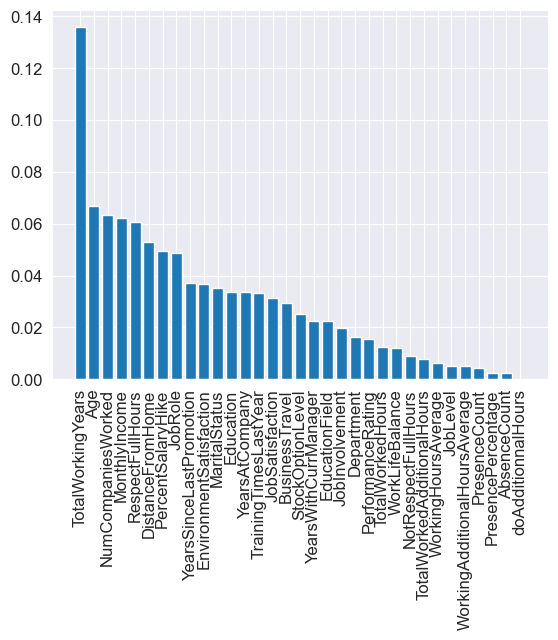

In [ ]:
importances = dtrs.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

# Print the feature importances
for i in range(len(sorted_importances)):
    print(f"{X_test.columns[sorted_indices[i]]}: {sorted_importances[i]}")

# Plot the feature importances
plt.bar(X_test.columns[sorted_indices], sorted_importances)
plt.xticks(rotation=90)
plt.show()